# Reproducing Hakim CDA Study (2019) - G vs B

In [4]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_brainvision

import sys
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\')
from cda_utils import get_epochs, get_CDA, prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Hakim-2019/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\Hakim-2019\\')
from events import get_specific_events
 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

study_id = 'Hakim2019'

## 1. Prep Data

Processing: G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\10\10_WM_att_NHKA.vhdr...
Extracting parameters from G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\10\10_WM_att_NHKA.vhdr...
Setting channel info structure...
Reading 0 ... 5127809  =      0.000 ... 10255.618 secs...


<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 149 epochs: 1, 2, 7, 43, 57, 64, 72, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 94, 97, 100, 101, 102, 107, 116, 130, 138, 140, 141, 142, 150, 175, 176, 198, 201, 202, 203, 204, 205, 206, 214, 217, 218, 245, 275, 276, 277, 280, 281, 282, 283, 284, 286, 287, 289, 290, 293, 295, 296, 303, 311, 312, 328, 329, 331, 332, 359, 360, 363, 364, 369, 384, 385, 391, 402, 407, 438, 439, 458, 469, 471, 472, 473, 474, 475, 476, 477, 478, 481, 482, 489, 495, 499, 516, 526, 527, 528, 532, 536, 551, 555, 570, 571, 572, 573, 574, 576, 581, 590, 591, 597, 600, 602, 603, 607, 616, 617, 618, 641, 657, 658, 659, 660, 662, 663, 664, 666, 668, 669, 673, 680, 696, 697, 705, 714, 716, 725, 729, 730, 746, 747, 763, 764, 766, 789


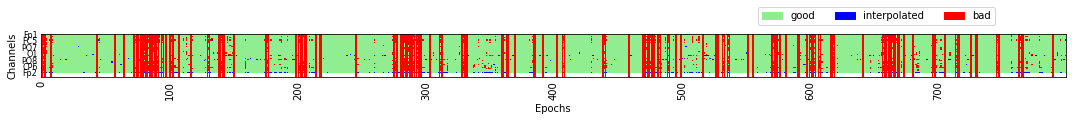

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\10\10_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.385559806312842
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\10\10_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.546428616454082
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\10\10_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 2.285784643346963
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\10\10_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 3.519827938388001
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\10\10_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.32946141786070376
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGDa

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 117 epochs: 59, 63, 69, 75, 83, 96, 97, 102, 104, 107, 115, 116, 117, 126, 134, 141, 145, 152, 153, 156, 159, 162, 163, 165, 166, 168, 180, 185, 194, 197, 209, 244, 255, 267, 273, 277, 281, 282, 284, 292, 293, 297, 301, 311, 313, 315, 316, 329, 333, 345, 346, 350, 351, 352, 357, 363, 365, 370, 374, 392, 394, 395, 398, 399, 439, 446, 447, 448, 449, 450, 454, 456, 468, 476, 477, 478, 479, 481, 483, 484, 502, 505, 514, 521, 522, 523, 527, 552, 572, 594, 595, 598, 624, 628, 639, 645, 649, 654, 664, 682, 683, 685, 696, 697, 698, 701, 703, 718, 728, 732, 734, 738, 742, 744, 748, 786, 794


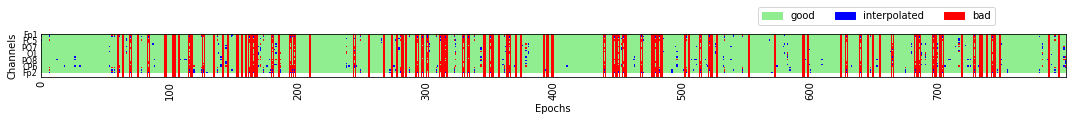

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\11\11_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.087068567305306
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\11\11_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.4834329824556527
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\11\11_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.232801077746997
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\11\11_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.3767487406057436
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\11\11_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.4628944500304193
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGDa

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 461 epochs: 0, 1, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 21, 22, 23, 26, 28, 29, 31, 36, 39, 40, 42, 43, 44, 45, 47, 50, 51, 54, 55, 58, 59, 60, 61, 62, 70, 71, 72, 74, 75, 79, 81, 82, 85, 87, 88, 90, 91, 93, 94, 96, 97, 98, 101, 103, 105, 109, 111, 113, 115, 117, 118, 119, 120, 121, 122, 125, 126, 128, 131, 134, 136, 137, 139, 141, 143, 144, 146, 147, 148, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 179, 180, 181, 183, 185, 186, 187, 188, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 215, 217, 219, 220, 224, 225, 226, 227, 230, 231, 234, 235, 236, 238, 240, 241, 243, 246, 247, 249, 250, 251, 252, 258, 260, 261, 263, 265, 267, 268, 270, 271, 276, 277, 280, 281, 282, 283, 285, 286, 292, 293, 294, 299, 300, 302, 303, 305, 307, 308, 309, 314, 315, 320, 323, 325, 326, 330, 331, 333, 335, 338, 339, 340, 341, 343, 344, 345, 346, 348, 349, 353, 354, 355, 356, 35

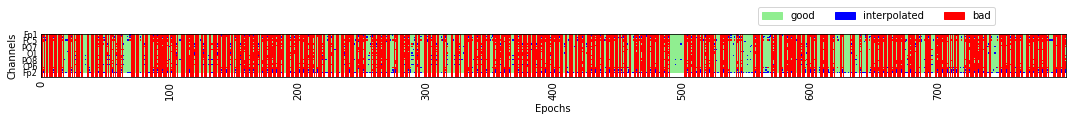

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================


C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
D:\PhD\CDA-review\studies\cda_utils.py:84: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_right = epochs_right.average()
D:\PhD\CDA-review\studies\cda_utils.py:85: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_left = epochs_left.average()


[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\12\12_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.5425058133680256
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\12\12_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: nan
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\12\12_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.07042436208129693
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\12\12_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 3.3720561145292347
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\12\12_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.440671025033826
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\12\12_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-bad: 0.5402441486921814
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\12\12_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-right-good: 0.9181390760994015
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\12\12_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-right-bad: 0.6073358740890158
Perf: good, Mean: 0.9929350691456375
[1

D:\PhD\CDA-review\studies\cda_utils.py:224: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
D:\PhD\CDA-review\studies\cda_utils.py:235: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
D:\PhD\CDA-review\studies\cda_utils.py:246: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


Processing: G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\13\13_WM_att_NHKA.vhdr...
Extracting parameters from G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\13\13_WM_att_NHKA.vhdr...
Setting channel info structure...
Reading 0 ... 5127149  =      0.000 ... 10254.298 secs...


<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 181 epochs: 2, 3, 4, 5, 8, 9, 10, 13, 53, 54, 58, 71, 74, 83, 85, 86, 90, 96, 105, 106, 107, 110, 116, 119, 120, 123, 125, 126, 128, 129, 132, 134, 139, 148, 153, 154, 155, 162, 165, 166, 168, 170, 173, 181, 187, 188, 192, 199, 200, 206, 207, 209, 212, 213, 215, 216, 243, 250, 262, 271, 300, 311, 316, 317, 318, 319, 320, 325, 327, 329, 334, 343, 348, 349, 351, 354, 360, 362, 363, 364, 367, 369, 370, 372, 378, 380, 386, 393, 396, 399, 401, 404, 405, 408, 410, 424, 429, 431, 440, 450, 451, 455, 460, 471, 472, 479, 490, 493, 496, 502, 511, 517, 520, 522, 523, 525, 532, 534, 536, 557, 558, 574, 576, 577, 581, 582, 589, 591, 593, 595, 596, 598, 602, 607, 609, 611, 633, 642, 644, 654, 663, 667, 668, 669, 675, 680, 685, 686, 690, 691, 693, 704, 705, 707, 711, 716, 720, 722, 725, 726, 727, 728, 729, 730, 732, 734, 739, 741, 742, 743, 757, 761, 782, 783, 784, 790, 791, 794, 795, 796, 798


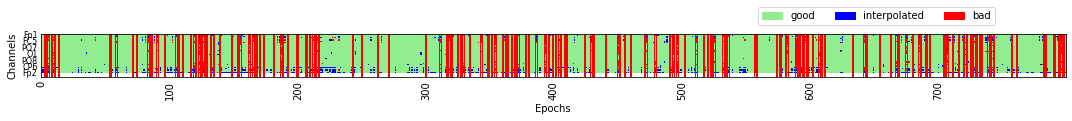

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\13\13_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.9953829309783514
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\13\13_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.29741327579396615
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\13\13_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.7823749323238607
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\13\13_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.2015974566939123
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\13\13_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.2534726047396443
[G:\CDA Datasets\Hakim 2019\Exp1a\E

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 90 epochs: 9, 56, 92, 100, 106, 108, 113, 114, 122, 128, 142, 146, 147, 148, 159, 169, 178, 185, 191, 201, 210, 221, 229, 264, 267, 281, 284, 296, 308, 310, 325, 347, 362, 364, 372, 373, 381, 404, 407, 408, 461, 480, 487, 490, 494, 506, 512, 531, 534, 536, 544, 546, 551, 554, 555, 564, 565, 568, 570, 572, 574, 585, 588, 593, 598, 607, 608, 611, 612, 625, 629, 632, 633, 644, 653, 672, 675, 681, 689, 705, 710, 735, 737, 743, 744, 747, 749, 757, 783, 797


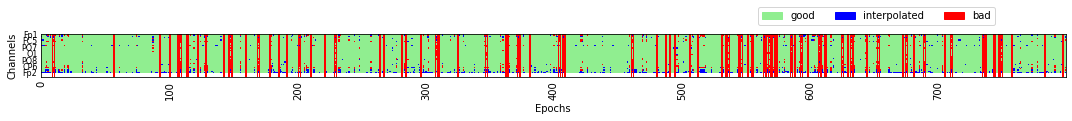

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\15\15_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.2439906430232736
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\15\15_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -1.6071930407995194
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\15\15_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.3618137109150974
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\15\15_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.7019614946727717
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\15\15_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.3714540143271739
[G:\CDA Datasets\Hakim 2019\Exp1a\E

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 243 epochs: 0, 2, 3, 4, 5, 11, 13, 15, 16, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 44, 45, 48, 51, 53, 58, 64, 66, 70, 71, 73, 78, 83, 85, 86, 91, 93, 94, 97, 99, 101, 103, 111, 120, 121, 122, 136, 139, 150, 152, 157, 163, 171, 173, 174, 185, 186, 191, 193, 196, 201, 203, 204, 205, 207, 208, 209, 210, 211, 212, 214, 215, 219, 220, 221, 224, 225, 227, 230, 231, 233, 238, 239, 240, 243, 244, 247, 252, 258, 276, 278, 282, 287, 288, 289, 293, 296, 304, 315, 323, 331, 339, 352, 357, 359, 361, 365, 366, 370, 373, 379, 380, 381, 386, 389, 395, 397, 402, 403, 404, 405, 406, 409, 412, 413, 414, 417, 419, 422, 423, 424, 425, 427, 428, 429, 431, 432, 433, 434, 436, 437, 438, 439, 440, 443, 444, 445, 448, 449, 455, 464, 465, 466, 472, 482, 496, 505, 508, 511, 514, 517, 527, 530, 533, 535, 540, 551, 552, 563, 568, 569, 571, 572, 573, 575, 578, 579, 583, 594, 595, 598, 605, 606, 610, 611, 613, 614, 615, 617, 618, 619, 620, 621, 626, 629, 630, 633, 641, 650, 65

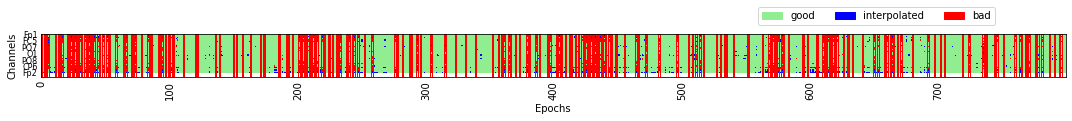

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\16\16_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.8361606973189218
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\16\16_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.3544330201767995
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\16\16_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.9021317513661625
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\16\16_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.712666387734425
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\16\16_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -1.1526001344723178
[G:\CDA Datasets\Hakim 2019\Exp1a\EE

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 192 epochs: 1, 3, 12, 14, 27, 31, 33, 38, 39, 46, 48, 51, 72, 73, 74, 75, 76, 78, 85, 90, 91, 93, 102, 103, 105, 107, 108, 114, 115, 116, 117, 120, 122, 135, 138, 153, 158, 173, 180, 181, 182, 183, 186, 220, 222, 233, 234, 236, 262, 263, 264, 265, 266, 271, 291, 292, 294, 296, 300, 304, 305, 307, 308, 309, 311, 312, 318, 319, 325, 344, 345, 348, 349, 356, 357, 369, 371, 376, 382, 390, 392, 402, 405, 408, 410, 418, 422, 423, 424, 425, 426, 427, 428, 443, 448, 449, 451, 452, 456, 457, 458, 460, 467, 468, 469, 470, 471, 472, 475, 478, 480, 481, 482, 483, 484, 486, 488, 490, 498, 499, 500, 501, 503, 514, 516, 521, 529, 531, 533, 534, 535, 545, 547, 550, 555, 561, 562, 563, 565, 570, 571, 573, 575, 580, 592, 597, 598, 619, 621, 626, 628, 629, 630, 631, 634, 647, 648, 649, 650, 651, 652, 656, 663, 664, 665, 676, 686, 687, 690, 691, 692, 696, 709, 726, 727, 728, 729, 730, 745, 756, 760, 764, 765, 766, 767, 768, 771, 779, 785, 786, 789, 790


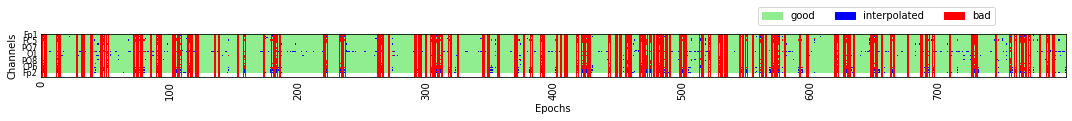

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\17\17_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.3545886926470731
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\17\17_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.31503113971478597
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\17\17_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.12844994638030155
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\17\17_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.53611392132807
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\17\17_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.30717992797169136
[G:\CDA Datasets\Hakim 2019\Exp1a\EE

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 274 epochs: 0, 1, 3, 14, 16, 20, 21, 22, 23, 26, 28, 29, 30, 31, 34, 35, 39, 45, 46, 60, 63, 69, 70, 74, 80, 87, 95, 100, 101, 110, 111, 113, 129, 130, 131, 132, 134, 138, 140, 141, 142, 143, 145, 147, 148, 152, 153, 154, 157, 159, 160, 162, 164, 168, 172, 174, 175, 177, 178, 179, 181, 193, 196, 197, 198, 201, 203, 207, 208, 214, 216, 218, 219, 221, 225, 226, 227, 233, 239, 247, 250, 265, 278, 284, 286, 295, 296, 297, 298, 304, 305, 308, 310, 312, 314, 315, 316, 317, 318, 322, 323, 324, 325, 327, 329, 330, 342, 345, 346, 347, 349, 350, 351, 352, 353, 356, 359, 360, 361, 363, 365, 366, 367, 369, 370, 372, 376, 381, 383, 388, 390, 397, 399, 401, 402, 403, 406, 408, 411, 412, 413, 415, 416, 417, 418, 424, 427, 442, 444, 454, 455, 465, 466, 467, 468, 471, 472, 481, 489, 491, 492, 495, 499, 510, 512, 520, 521, 522, 523, 525, 526, 529, 530, 532, 538, 540, 542, 545, 546, 550, 551, 555, 557, 558, 559, 560, 561, 567, 572, 575, 576, 585, 588, 589, 590, 591, 593, 594, 596, 597, 600, 602, 

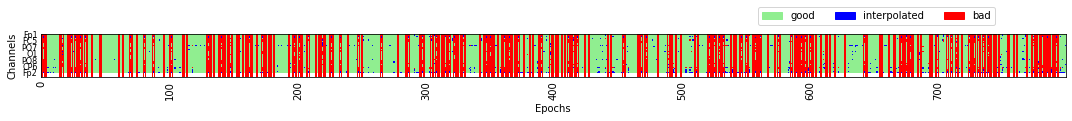

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\18\18_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.0119869314039607
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\18\18_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.5538032847715677
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\18\18_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -1.4432484570179565
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\18\18_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.13664917101102314
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\18\18_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.8790397708931903
[G:\CDA Datasets\Hakim 2019\Exp1a\EE

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=30


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


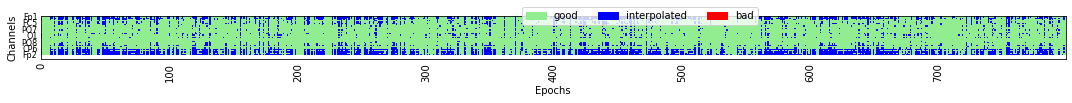

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\20\20_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.06625133042471208
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\20\20_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.4488019946746655
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\20\20_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.6818415019429198
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\20\20_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.9100726614761706
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\20\20_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.27150929213057384
[G:\CDA Datasets\Hakim 2019\Exp1a\E

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 243 epochs: 18, 20, 21, 24, 26, 28, 29, 30, 31, 32, 35, 40, 45, 61, 64, 72, 73, 75, 76, 78, 81, 83, 85, 86, 87, 88, 89, 90, 97, 98, 104, 106, 111, 113, 116, 120, 125, 131, 132, 134, 147, 152, 155, 163, 165, 173, 176, 179, 182, 183, 187, 191, 194, 197, 198, 199, 202, 211, 216, 220, 232, 235, 239, 242, 243, 244, 246, 248, 251, 254, 258, 261, 269, 272, 278, 280, 282, 284, 285, 290, 296, 297, 300, 312, 313, 314, 315, 326, 335, 350, 353, 359, 363, 365, 370, 371, 374, 378, 380, 382, 383, 385, 387, 388, 389, 390, 392, 394, 398, 399, 400, 410, 414, 419, 421, 424, 426, 429, 437, 440, 441, 444, 445, 446, 447, 448, 452, 453, 454, 455, 458, 462, 463, 467, 469, 470, 474, 479, 480, 482, 486, 487, 488, 489, 491, 494, 496, 497, 499, 500, 512, 531, 538, 539, 543, 544, 546, 547, 548, 550, 551, 553, 563, 564, 569, 572, 573, 575, 576, 578, 580, 581, 590, 593, 599, 603, 606, 611, 614, 617, 625, 626, 628, 629, 634, 635, 636, 638, 640, 641, 642, 643, 644, 645, 647, 652, 660, 663, 670, 673, 675, 678, 

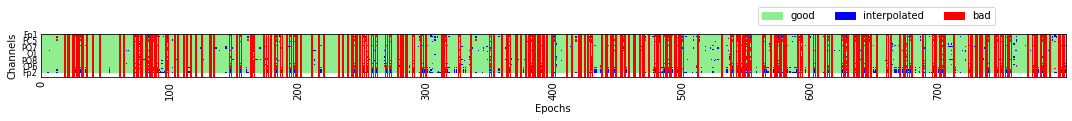

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\21\21_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.6837797323361614
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\21\21_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 2.9810779432524104
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\21\21_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.4648938533911736
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\21\21_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.6229881353295623
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\21\21_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.7989304499171341
[G:\CDA Datasets\Hakim 2019\Exp1a\EE

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 198 epochs: 11, 21, 22, 32, 33, 35, 36, 39, 41, 45, 46, 49, 53, 59, 64, 65, 71, 74, 80, 83, 84, 94, 102, 110, 114, 115, 116, 117, 118, 121, 125, 128, 131, 141, 145, 148, 157, 161, 165, 174, 176, 177, 186, 187, 192, 195, 199, 201, 204, 206, 210, 212, 215, 216, 218, 221, 234, 243, 245, 248, 249, 253, 255, 256, 258, 259, 261, 275, 276, 281, 284, 286, 288, 290, 292, 298, 307, 314, 317, 325, 329, 331, 348, 356, 361, 366, 367, 369, 370, 372, 382, 385, 390, 392, 397, 399, 405, 410, 411, 423, 427, 429, 430, 431, 432, 433, 440, 442, 443, 444, 451, 454, 459, 462, 465, 467, 469, 474, 476, 480, 490, 494, 502, 507, 509, 510, 516, 518, 519, 523, 524, 526, 531, 532, 536, 542, 550, 552, 563, 565, 567, 578, 579, 580, 584, 587, 596, 598, 599, 604, 610, 612, 613, 620, 626, 629, 634, 638, 650, 653, 654, 656, 659, 661, 662, 664, 672, 678, 685, 686, 687, 692, 698, 702, 706, 707, 722, 723, 727, 737, 744, 745, 753, 755, 759, 766, 771, 772, 773, 780, 783, 784, 786, 787, 788, 793, 794, 796


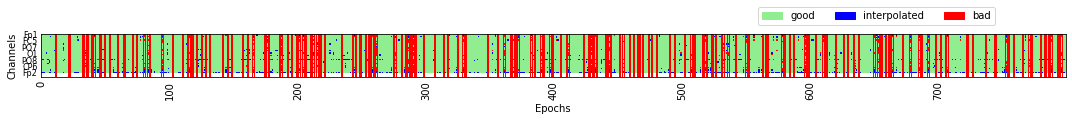

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\22\22_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.7244892095257454
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\22\22_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.1125071103061033
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\22\22_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.69850713281792
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\22\22_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.8335448717543659
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\22\22_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.8637720801671026
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGDat

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 6 epochs: 319, 379, 386, 581, 657, 789


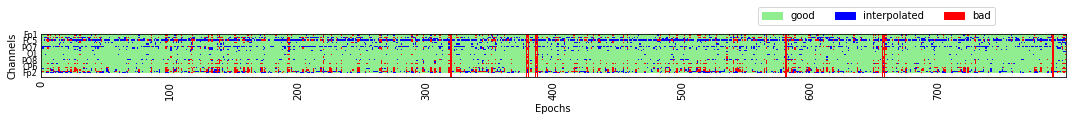

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\23\23_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.2126272724546605
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\23\23_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.41172215428063524
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\23\23_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.8071058618309094
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\23\23_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.0508392811734066
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\23\23_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.5519267922236436
[G:\CDA Datasets\Hakim 2019\Exp1a\

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 253 epochs: 2, 9, 18, 19, 23, 24, 25, 27, 28, 29, 30, 33, 51, 52, 53, 56, 60, 63, 65, 70, 72, 78, 82, 93, 100, 102, 110, 111, 113, 116, 118, 119, 120, 122, 124, 132, 133, 136, 137, 140, 142, 149, 150, 151, 154, 163, 170, 183, 186, 190, 191, 192, 196, 199, 200, 209, 213, 214, 217, 219, 227, 228, 248, 249, 252, 257, 259, 260, 261, 265, 272, 273, 274, 280, 281, 282, 293, 295, 300, 305, 306, 309, 310, 311, 312, 313, 315, 316, 317, 320, 321, 323, 324, 327, 328, 329, 330, 331, 333, 335, 340, 343, 349, 353, 354, 359, 360, 361, 362, 377, 378, 384, 385, 386, 389, 392, 397, 398, 403, 408, 413, 416, 418, 419, 423, 425, 427, 429, 431, 435, 436, 437, 439, 440, 441, 443, 452, 458, 474, 475, 477, 481, 482, 486, 487, 488, 492, 495, 496, 498, 500, 503, 504, 507, 508, 512, 526, 527, 528, 530, 531, 533, 540, 548, 549, 551, 554, 565, 567, 570, 573, 574, 577, 578, 582, 583, 584, 588, 593, 597, 599, 600, 602, 609, 614, 616, 619, 620, 629, 631, 632, 633, 634, 635, 638, 639, 640, 645, 665, 670, 683, 6

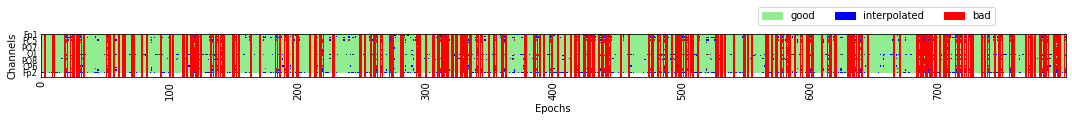

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\24\24_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.704064276739064
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\24\24_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.6836845072971499
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\24\24_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.6308753555355444
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\24\24_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.9909197621781323
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\24\24_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.49599058901550447
[G:\CDA Datasets\Hakim 2019\Exp1a\E

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 169 epochs: 0, 3, 4, 6, 13, 17, 18, 19, 21, 30, 32, 33, 36, 39, 43, 47, 50, 51, 56, 57, 68, 83, 85, 96, 100, 103, 118, 119, 127, 128, 139, 143, 166, 176, 177, 181, 185, 188, 195, 197, 204, 205, 214, 221, 224, 232, 233, 234, 237, 240, 244, 245, 246, 252, 253, 257, 261, 263, 289, 291, 292, 293, 297, 305, 330, 336, 342, 348, 355, 356, 372, 381, 383, 392, 393, 402, 405, 408, 411, 415, 416, 417, 424, 426, 428, 431, 442, 452, 454, 463, 471, 472, 480, 484, 496, 499, 504, 508, 511, 512, 515, 517, 523, 524, 525, 528, 535, 536, 541, 544, 546, 553, 556, 560, 572, 577, 578, 580, 588, 591, 593, 608, 617, 621, 623, 624, 626, 627, 631, 632, 633, 634, 641, 642, 643, 646, 666, 674, 680, 682, 691, 701, 703, 712, 717, 720, 727, 729, 731, 751, 753, 754, 757, 759, 760, 762, 764, 765, 766, 767, 768, 771, 772, 778, 779, 781, 785, 793, 794


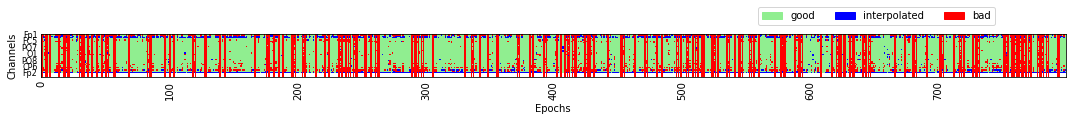

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\25\25_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.6299115314729677
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\25\25_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 2.795481635647289
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\25\25_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.05853821762141277
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\25\25_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.6440606800406845
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\25\25_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.9905760367449794
[G:\CDA Datasets\Hakim 2019\Exp1a\EEG

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 154 epochs: 16, 26, 36, 38, 41, 43, 47, 85, 86, 88, 89, 91, 95, 104, 106, 114, 121, 124, 125, 140, 149, 153, 158, 159, 170, 172, 174, 177, 180, 183, 185, 190, 192, 193, 195, 196, 198, 206, 207, 230, 247, 256, 266, 273, 279, 299, 332, 354, 358, 360, 363, 365, 367, 370, 373, 383, 387, 390, 391, 392, 395, 400, 401, 408, 413, 420, 429, 434, 435, 438, 444, 449, 453, 457, 458, 466, 468, 471, 473, 478, 479, 481, 487, 488, 494, 497, 500, 508, 509, 511, 512, 516, 520, 524, 530, 531, 536, 542, 559, 561, 569, 573, 582, 584, 588, 591, 592, 593, 595, 599, 600, 601, 616, 617, 618, 619, 628, 630, 635, 638, 642, 651, 657, 674, 682, 686, 687, 692, 693, 699, 709, 718, 719, 722, 732, 733, 734, 737, 740, 741, 746, 747, 750, 756, 759, 762, 772, 781, 782, 793, 794, 796, 797, 799


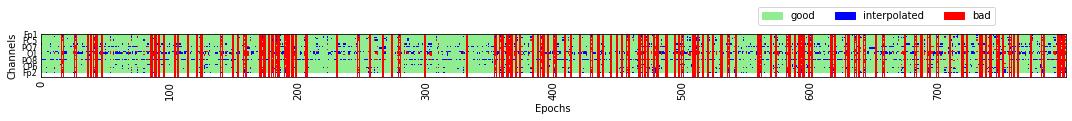

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\28\28_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.05712057375606258
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\28\28_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.3965664329320685
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\28\28_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.8448671742440895
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\28\28_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.09619742067853652
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\28\28_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.1150670412393877
[G:\CDA Datasets\Hakim 2019\Exp1a\

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 301 epochs: 0, 1, 2, 10, 12, 16, 20, 21, 23, 24, 25, 30, 37, 39, 41, 43, 53, 58, 59, 60, 61, 62, 66, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 88, 91, 92, 94, 97, 98, 99, 100, 102, 113, 115, 118, 120, 121, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 142, 143, 146, 147, 157, 158, 160, 163, 172, 174, 175, 184, 185, 186, 187, 188, 193, 194, 195, 196, 197, 199, 204, 207, 214, 215, 217, 224, 229, 230, 239, 242, 244, 246, 249, 253, 254, 255, 258, 259, 260, 261, 262, 263, 264, 267, 268, 270, 271, 274, 276, 282, 283, 286, 287, 288, 289, 291, 293, 294, 295, 297, 299, 300, 305, 310, 311, 312, 313, 316, 318, 320, 322, 323, 325, 326, 330, 333, 335, 344, 348, 351, 353, 366, 368, 369, 371, 376, 379, 382, 383, 385, 387, 388, 392, 393, 394, 395, 396, 398, 399, 404, 406, 409, 414, 423, 429, 432, 437, 439, 441, 442, 443, 445, 450, 451, 452, 454, 458, 462, 463, 464, 465, 466, 468, 469, 470, 471, 472, 474, 475, 476, 479, 481, 482, 487, 491, 492, 493, 494, 495, 498, 

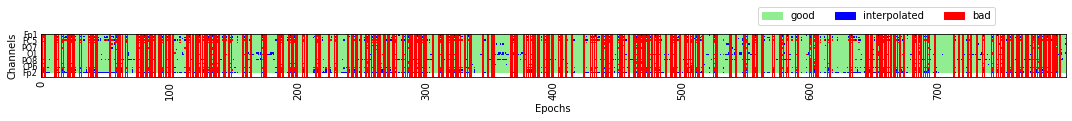

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\29\29_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.7950179991157348
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\29\29_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.426588046084787
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\29\29_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.028688560771734
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\29\29_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.5026125745542959
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\29\29_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.870606780122987
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 129 epochs: 0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 66, 67, 79, 84, 86, 88, 96, 113, 118, 126, 141, 158, 160, 161, 165, 174, 187, 190, 197, 199, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 217, 218, 221, 281, 282, 283, 290, 291, 301, 303, 322, 346, 347, 356, 358, 375, 380, 384, 387, 396, 400, 401, 402, 403, 404, 407, 409, 410, 416, 442, 450, 451, 454, 459, 462, 475, 476, 480, 494, 498, 526, 527, 528, 531, 556, 583, 587, 599, 600, 602, 603, 604, 605, 606, 607, 608, 609, 612, 625, 662, 665, 666, 673, 680, 681, 690, 691, 692, 694, 704, 715, 717, 719, 721, 723, 734, 749, 750, 760, 761, 763, 764, 777, 778, 788, 789, 790, 795


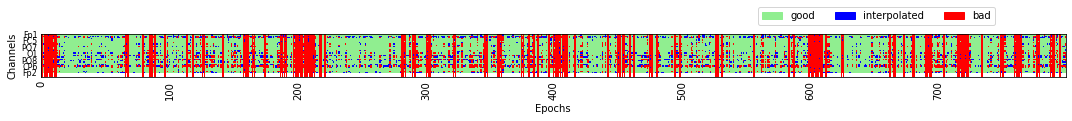

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\31\31_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.49734027949566534
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\31\31_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.952058707520968
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\31\31_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.9196912693747878
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\31\31_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.9147519657375597
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\31\31_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.4290212121646831
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGD

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 417 epochs: 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 21, 22, 26, 27, 29, 30, 31, 32, 34, 36, 37, 39, 40, 41, 42, 43, 44, 46, 48, 49, 51, 53, 54, 57, 58, 59, 65, 71, 72, 80, 81, 82, 84, 86, 87, 89, 101, 102, 108, 109, 113, 119, 120, 122, 125, 126, 127, 128, 131, 132, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 150, 151, 152, 155, 156, 158, 159, 160, 161, 163, 168, 169, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 198, 199, 200, 202, 203, 205, 207, 208, 209, 211, 212, 213, 218, 219, 220, 221, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 238, 240, 241, 248, 249, 250, 251, 252, 260, 268, 270, 271, 272, 275, 278, 281, 283, 303, 304, 307, 313, 321, 322, 329, 330, 331, 332, 333, 334, 335, 336, 338, 339, 341, 342, 344, 345, 347, 348, 349, 351, 352, 354, 355, 356, 357, 360, 361, 362, 363, 365, 369, 371, 372, 373, 374, 375, 376, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 

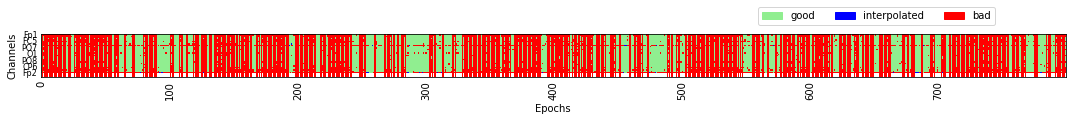

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\34\34_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.4808946746264629
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\34\34_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.4179065198373417
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\34\34_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.2801490663697368
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\34\34_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.445363763755421
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\34\34_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.7523537724350279
[G:\CDA Datasets\Hakim 2019\Exp1a\EEG

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 410 epochs: 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 112, 113, 114, 115, 117, 119, 121, 122, 130, 133, 134, 135, 136, 137, 138, 140, 145, 146, 147, 161, 171, 172, 173, 188, 189, 191, 199, 204, 205, 206, 207, 208, 209, 210, 211, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 229, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 245, 247, 248, 254, 259, 260, 261, 262, 264, 265, 266, 267, 268, 270, 271, 272, 273, 274, 275, 278, 279, 280, 281, 282, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 300, 301, 302, 303, 304, 305, 307, 310, 311, 321, 323, 324, 325, 326, 335, 339, 340, 346, 353, 354, 355, 361, 362, 364, 377, 379, 387, 391, 395, 406, 407, 408, 409, 410, 4

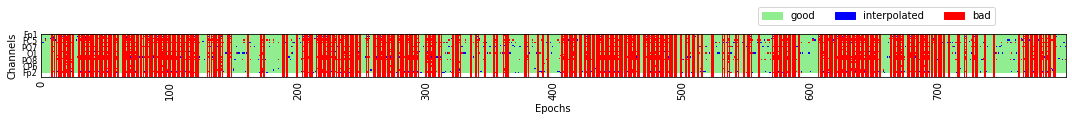

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\35\35_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.8528498014949537
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\35\35_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 5.243407881569978
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\35\35_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -1.6689921097856877
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\35\35_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.1478336361937203
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\35\35_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.6076582806782411
[G:\CDA Datasets\Hakim 2019\Exp1a\EEG

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 48 epochs: 0, 33, 53, 67, 74, 117, 118, 121, 134, 153, 164, 168, 181, 187, 206, 243, 244, 259, 265, 288, 297, 300, 308, 309, 310, 318, 382, 391, 443, 446, 460, 479, 480, 494, 497, 501, 529, 531, 550, 553, 565, 657, 668, 677, 682, 688, 739, 756


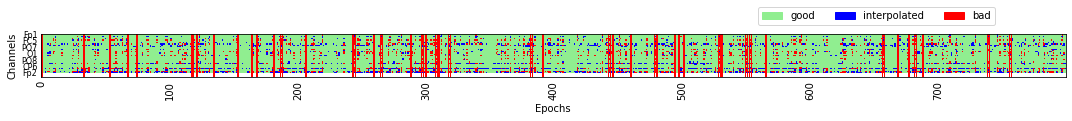

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\36\36_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.15349985155749565
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\36\36_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.14705477806785952
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\36\36_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.08975736484754931
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\36\36_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.4137889827494035
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\36\36_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.16795882717194585
[G:\CDA Datasets\Hakim 2019\Exp1

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 143 epochs: 0, 7, 8, 10, 13, 18, 19, 21, 26, 28, 38, 39, 41, 43, 54, 58, 78, 81, 84, 92, 100, 101, 103, 113, 114, 121, 123, 135, 156, 163, 168, 179, 186, 201, 202, 204, 210, 215, 218, 224, 234, 240, 242, 243, 249, 250, 253, 254, 258, 266, 273, 275, 277, 280, 284, 286, 289, 299, 309, 336, 342, 347, 351, 353, 358, 369, 374, 376, 378, 390, 394, 398, 403, 404, 406, 410, 413, 415, 420, 421, 422, 439, 448, 452, 454, 457, 461, 464, 474, 479, 481, 483, 488, 489, 490, 493, 495, 497, 501, 508, 515, 522, 538, 541, 549, 557, 570, 573, 576, 592, 598, 600, 601, 603, 605, 607, 612, 618, 619, 620, 633, 638, 642, 644, 659, 666, 675, 677, 680, 687, 689, 690, 703, 704, 706, 728, 730, 752, 757, 769, 770, 778, 787


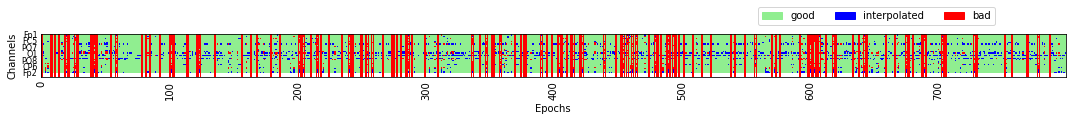

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\38\38_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.4984916663891434
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\38\38_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 3.1151687802826102
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\38\38_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.2140618503369924
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\38\38_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -2.6608099474992852
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\38\38_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 2.1221149219915967
[G:\CDA Datasets\Hakim 2019\Exp1a\EE

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 197 epochs: 12, 17, 18, 36, 37, 45, 49, 53, 59, 60, 63, 64, 70, 73, 76, 77, 84, 87, 91, 94, 95, 97, 100, 104, 109, 112, 115, 117, 119, 121, 123, 125, 132, 137, 138, 145, 155, 156, 159, 161, 166, 167, 184, 185, 186, 188, 191, 195, 196, 197, 198, 199, 200, 201, 203, 213, 226, 235, 237, 256, 265, 266, 268, 271, 273, 282, 283, 284, 286, 290, 297, 300, 304, 308, 309, 311, 314, 321, 325, 328, 330, 332, 339, 341, 342, 348, 350, 351, 354, 356, 357, 358, 360, 366, 371, 389, 391, 394, 395, 424, 427, 440, 441, 446, 448, 449, 451, 453, 465, 470, 475, 478, 480, 486, 493, 514, 515, 516, 517, 521, 522, 529, 530, 532, 533, 560, 566, 569, 570, 572, 576, 578, 579, 580, 581, 583, 585, 589, 590, 591, 592, 594, 598, 604, 605, 616, 617, 627, 640, 651, 657, 658, 659, 662, 663, 668, 671, 672, 677, 678, 680, 682, 685, 686, 687, 690, 693, 695, 700, 702, 704, 707, 712, 714, 718, 724, 728, 729, 730, 731, 732, 734, 735, 742, 769, 770, 772, 773, 774, 779, 780, 785, 789, 790, 793, 795, 798


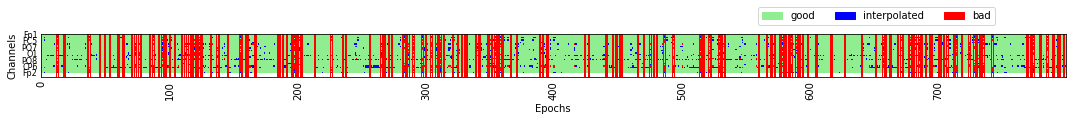

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\39\39_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -1.3798664951813273
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\39\39_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.7578130038514906
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\39\39_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 2.761139755130573
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\39\39_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 3.05078265786094
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\39\39_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -2.3912157631934017
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGD

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 177 epochs: 58, 65, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 104, 113, 116, 119, 129, 133, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 155, 156, 157, 158, 159, 160, 161, 162, 165, 179, 180, 181, 188, 189, 190, 192, 193, 261, 274, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 297, 299, 302, 316, 319, 321, 323, 332, 333, 334, 335, 336, 338, 339, 340, 341, 342, 343, 345, 349, 350, 364, 388, 391, 392, 396, 397, 399, 446, 455, 463, 464, 465, 466, 469, 470, 471, 478, 479, 480, 486, 487, 493, 495, 499, 500, 505, 506, 507, 508, 509, 523, 524, 526, 550, 557, 558, 559, 560, 561, 570, 571, 572, 573, 579, 581, 586, 587, 588, 589, 591, 599, 658, 659, 660, 664, 666, 667, 668, 676, 683, 685, 686, 687, 691, 692, 694, 697, 701, 703, 705, 707, 708, 709, 712, 714, 715, 716, 717, 718, 719, 720, 722, 734, 763, 764, 765, 766, 767, 769, 775, 782, 783, 791, 792, 793, 794, 795


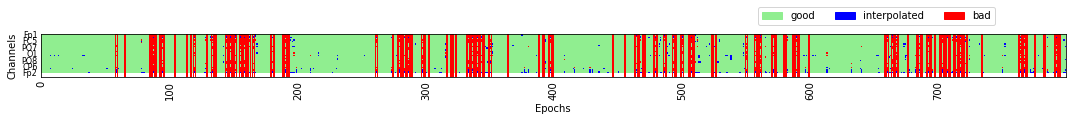

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.9501277610221434
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 2.352808888610249
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.27691261215840113
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.28750892750147605
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.44053009478189425
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\4\

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=30


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


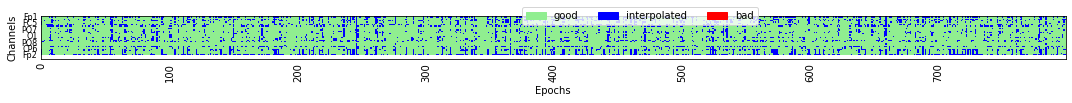

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\42\42_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.4155602688777649
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\42\42_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.71452992981479
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\42\42_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.6058449670354741
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\42\42_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.9026258968483958
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\42\42_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.865851161209828
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGDat

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 36 epochs: 0, 29, 35, 63, 68, 106, 122, 132, 164, 165, 171, 177, 195, 222, 250, 254, 318, 342, 352, 432, 434, 479, 485, 500, 501, 504, 508, 513, 545, 631, 642, 667, 674, 726, 730, 776


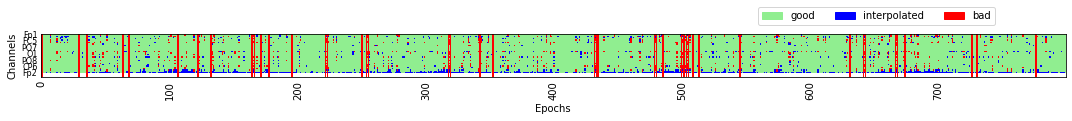

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\5\5_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.8306908314829409
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\5\5_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 2.2474904315060393
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\5\5_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.3788447660241343
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\5\5_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -3.1837884680010573
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\5\5_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 3.2570544495577898
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\5\5_

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 115 epochs: 9, 10, 11, 28, 31, 34, 41, 54, 60, 63, 68, 69, 70, 73, 78, 80, 81, 99, 101, 106, 111, 113, 116, 118, 130, 135, 138, 145, 150, 152, 157, 161, 164, 171, 180, 198, 204, 209, 214, 216, 224, 226, 231, 234, 240, 262, 263, 264, 273, 280, 282, 285, 290, 302, 325, 336, 340, 342, 347, 354, 368, 371, 402, 407, 430, 433, 434, 436, 438, 440, 446, 454, 460, 471, 475, 478, 485, 507, 510, 517, 522, 527, 530, 532, 540, 546, 556, 567, 585, 593, 616, 617, 619, 628, 636, 656, 663, 664, 665, 667, 670, 676, 688, 694, 699, 701, 702, 705, 716, 724, 725, 726, 757, 788, 789


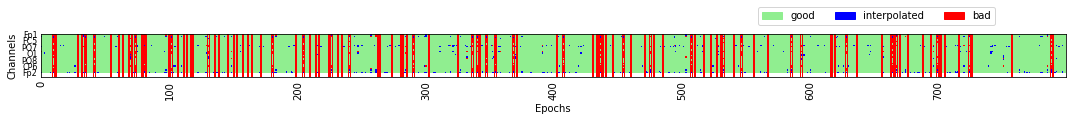

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\6\6_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.26351738872808184
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\6\6_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.825064827638994
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\6\6_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.9783809050894887
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\6\6_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.7551989158339747
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\6\6_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.00998974785443144
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\6\6_

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 188 epochs: 1, 5, 9, 12, 17, 18, 26, 29, 30, 35, 36, 38, 39, 42, 51, 56, 58, 60, 61, 63, 66, 69, 76, 79, 85, 90, 95, 96, 97, 101, 102, 107, 122, 130, 132, 134, 139, 147, 149, 154, 158, 171, 179, 185, 188, 193, 194, 198, 200, 202, 206, 214, 215, 223, 224, 232, 244, 246, 247, 248, 250, 251, 252, 254, 256, 258, 262, 264, 275, 278, 280, 281, 287, 291, 295, 297, 299, 303, 304, 306, 310, 312, 313, 314, 335, 342, 343, 352, 359, 360, 366, 373, 384, 397, 398, 399, 400, 403, 407, 410, 411, 423, 432, 433, 434, 436, 437, 438, 442, 465, 466, 467, 468, 469, 477, 483, 484, 488, 489, 490, 491, 492, 493, 495, 503, 505, 515, 523, 524, 526, 533, 535, 536, 537, 542, 555, 562, 572, 573, 576, 578, 581, 586, 589, 590, 593, 601, 603, 610, 613, 620, 626, 628, 630, 631, 633, 645, 646, 647, 649, 650, 652, 653, 655, 667, 669, 671, 678, 683, 696, 699, 711, 721, 731, 737, 743, 753, 755, 761, 764, 766, 767, 769, 773, 774, 783, 785, 792


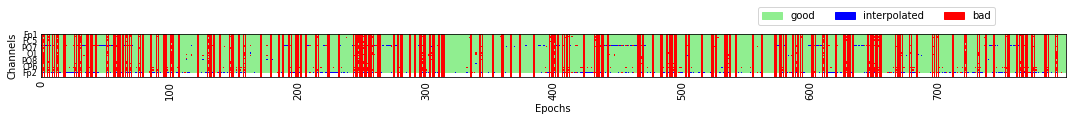

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\7\7_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 2.281811029524472
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\7\7_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 2.111942932394675
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\7\7_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.8391683809223441
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\7\7_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.3160025204398855
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\7\7_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 2.2348748913752807
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\7\7_WM

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 183 epochs: 7, 11, 12, 15, 17, 18, 19, 20, 25, 27, 28, 29, 30, 32, 34, 35, 37, 38, 40, 41, 45, 46, 47, 49, 50, 52, 54, 55, 57, 58, 59, 60, 61, 62, 68, 70, 75, 98, 113, 126, 148, 154, 170, 180, 190, 192, 193, 194, 197, 201, 202, 204, 205, 206, 207, 208, 210, 212, 216, 218, 220, 221, 222, 223, 224, 226, 228, 230, 233, 234, 235, 236, 237, 240, 241, 244, 245, 249, 251, 269, 285, 303, 350, 358, 365, 370, 381, 392, 393, 399, 407, 409, 410, 411, 412, 413, 415, 416, 417, 418, 419, 421, 423, 424, 428, 429, 430, 431, 433, 434, 435, 436, 437, 438, 439, 442, 443, 446, 447, 448, 449, 450, 454, 467, 482, 490, 539, 540, 552, 559, 560, 561, 562, 563, 566, 567, 568, 570, 573, 574, 575, 611, 612, 615, 617, 621, 623, 625, 629, 630, 631, 635, 636, 637, 639, 642, 643, 644, 645, 647, 648, 649, 650, 651, 652, 653, 656, 658, 661, 678, 695, 702, 765, 770, 771, 772, 773, 775, 777, 778, 780, 788, 799


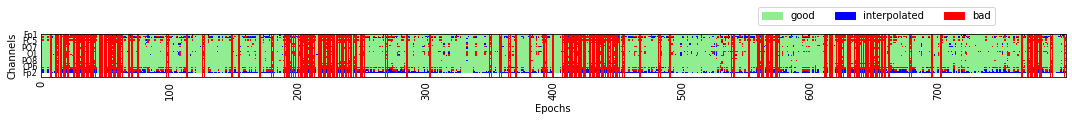

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\9\9_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.8512586238784184
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\9\9_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.0847028195561454
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\9\9_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.5853595915801253
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\9\9_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.2272911604357595
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\9\9_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.7346121446704044
[G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\9\9_W

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 185 epochs: 0, 6, 11, 14, 18, 19, 22, 26, 38, 47, 70, 76, 81, 92, 93, 95, 98, 116, 118, 123, 132, 138, 163, 165, 167, 173, 175, 179, 181, 185, 186, 188, 189, 191, 192, 195, 211, 214, 215, 222, 223, 226, 240, 241, 259, 271, 277, 284, 304, 305, 306, 307, 312, 316, 323, 339, 348, 349, 354, 364, 377, 379, 381, 384, 388, 389, 390, 392, 393, 394, 397, 400, 404, 412, 414, 415, 421, 423, 424, 426, 427, 431, 435, 447, 448, 451, 454, 460, 462, 466, 468, 470, 474, 475, 476, 491, 493, 494, 499, 504, 507, 509, 512, 515, 516, 518, 519, 520, 522, 523, 535, 538, 539, 541, 544, 549, 550, 557, 558, 560, 561, 563, 566, 569, 571, 573, 574, 575, 577, 578, 579, 581, 582, 584, 592, 601, 602, 610, 615, 616, 619, 620, 621, 622, 624, 628, 629, 631, 632, 645, 647, 648, 650, 655, 660, 662, 669, 670, 674, 684, 687, 697, 713, 717, 720, 728, 731, 741, 743, 745, 746, 750, 753, 754, 758, 760, 761, 763, 773, 774, 777, 781, 785, 790, 793


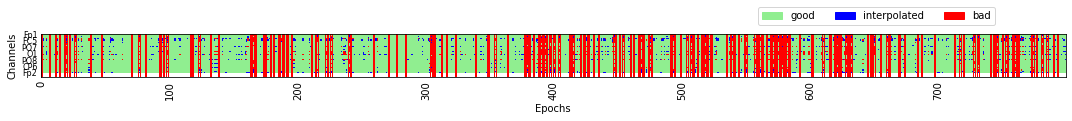

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\11\11_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.7528328441491986
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\11\11_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.34077741806144474
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\11\11_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.4377754215704772
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\11\11_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.8926469896132043
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\11\11_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.1722481901863682
[G:\CDA Datasets\Hak

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 240 epochs: 4, 11, 14, 18, 20, 21, 22, 23, 24, 31, 39, 45, 46, 47, 48, 55, 58, 61, 62, 63, 66, 69, 70, 71, 72, 76, 77, 80, 85, 96, 97, 98, 99, 101, 103, 107, 113, 120, 123, 130, 131, 134, 137, 139, 141, 157, 158, 159, 164, 169, 180, 186, 188, 189, 190, 191, 193, 197, 198, 199, 201, 204, 205, 211, 212, 217, 218, 219, 220, 236, 239, 241, 243, 244, 245, 246, 247, 248, 258, 262, 263, 264, 267, 268, 269, 271, 272, 273, 275, 277, 278, 279, 280, 284, 289, 291, 293, 294, 298, 303, 304, 305, 306, 309, 310, 312, 327, 328, 333, 335, 345, 349, 352, 366, 371, 372, 383, 387, 389, 391, 393, 394, 395, 396, 398, 402, 405, 406, 407, 409, 417, 418, 420, 423, 424, 426, 430, 431, 433, 437, 438, 439, 442, 445, 446, 449, 453, 454, 456, 458, 459, 464, 469, 475, 487, 490, 496, 499, 501, 504, 509, 510, 526, 527, 528, 533, 534, 543, 559, 562, 563, 570, 572, 573, 575, 576, 577, 584, 585, 589, 590, 596, 599, 600, 601, 604, 605, 611, 613, 620, 626, 627, 631, 633, 634, 637, 642, 644, 645, 646, 653, 654, 655,

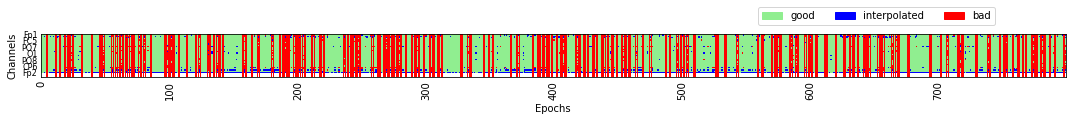

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\14\14_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.9127303037594311
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\14\14_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 2.2814380150409868
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\14\14_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.3331432657512764
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\14\14_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.500387061554449
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\14\14_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.7558620279836924
[G:\CDA Datasets\Hakim 2

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 83 epochs: 16, 49, 50, 61, 64, 67, 75, 86, 92, 108, 109, 125, 129, 135, 169, 172, 174, 179, 183, 185, 197, 213, 218, 219, 220, 223, 234, 246, 250, 283, 290, 304, 316, 324, 329, 334, 369, 379, 381, 393, 414, 424, 440, 446, 457, 458, 466, 475, 476, 492, 494, 503, 507, 509, 517, 525, 538, 545, 552, 558, 567, 582, 597, 598, 599, 635, 655, 658, 669, 688, 699, 712, 716, 721, 728, 730, 734, 753, 755, 759, 761, 764, 782


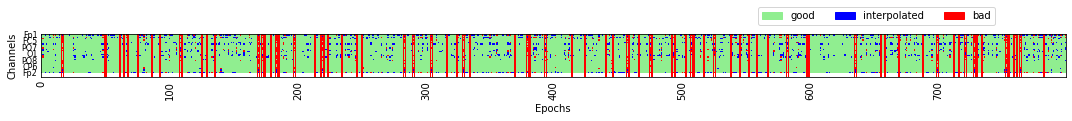

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\16\16_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.093178560935507
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\16\16_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.3528379010928066
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\16\16_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.4751178226053068
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\16\16_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.5824601891395358
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\16\16_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.5321211877095837
[G:\CDA Datasets\Hakim 2

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 198 epochs: 6, 10, 15, 33, 42, 49, 52, 56, 57, 60, 63, 65, 71, 73, 78, 86, 87, 89, 101, 108, 113, 114, 115, 116, 117, 120, 121, 122, 123, 125, 126, 129, 134, 137, 145, 148, 158, 163, 169, 170, 171, 175, 179, 184, 187, 188, 190, 191, 194, 202, 207, 226, 227, 239, 240, 247, 248, 250, 251, 258, 262, 267, 269, 270, 272, 273, 277, 278, 280, 282, 297, 300, 309, 312, 316, 319, 324, 327, 331, 335, 339, 345, 346, 349, 356, 358, 364, 366, 370, 372, 374, 382, 383, 386, 390, 391, 397, 398, 404, 406, 413, 428, 446, 448, 454, 456, 466, 474, 478, 479, 481, 483, 487, 489, 493, 496, 497, 498, 504, 505, 508, 513, 516, 520, 522, 525, 530, 531, 532, 534, 538, 542, 550, 556, 557, 567, 571, 573, 574, 577, 581, 584, 585, 589, 590, 593, 595, 597, 599, 603, 605, 606, 611, 616, 626, 627, 634, 635, 636, 637, 645, 652, 657, 658, 660, 663, 668, 679, 684, 688, 689, 690, 693, 695, 696, 697, 698, 701, 703, 710, 711, 712, 715, 718, 719, 735, 741, 743, 745, 761, 765, 766, 783, 793, 794, 795, 796, 797


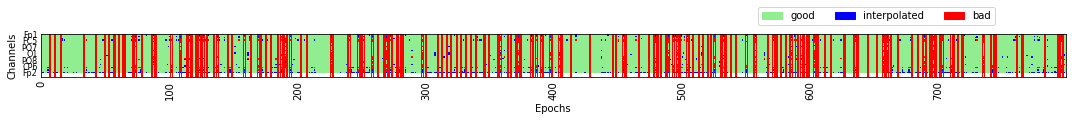

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\17\17_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.38278694499663773
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\17\17_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.34851492574709575
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\17\17_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.4387576761048957
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\17\17_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.0391145559355062
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\17\17_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.35901906782597065
[G:\CDA Datasets\

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 29 epochs: 39, 42, 46, 118, 189, 205, 275, 295, 296, 313, 332, 362, 385, 428, 451, 481, 530, 545, 555, 558, 578, 583, 597, 686, 689, 751, 760, 764, 766


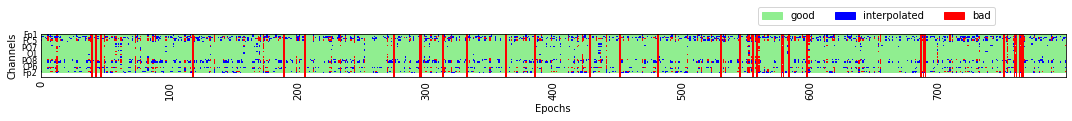

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\18\18_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.4837503340096498
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\18\18_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.7972184233380029
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\18\18_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.4442866629076767
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\18\18_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.8365269108689998
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\18\18_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.07543255386151662
[G:\CDA Datasets\Ha

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 144 epochs: 6, 7, 8, 13, 14, 18, 19, 26, 27, 28, 29, 35, 64, 66, 71, 90, 92, 93, 122, 124, 152, 153, 158, 165, 168, 169, 170, 171, 172, 184, 186, 193, 195, 198, 202, 204, 208, 216, 217, 218, 220, 221, 223, 225, 226, 230, 232, 233, 237, 239, 240, 242, 268, 269, 279, 293, 301, 307, 318, 327, 332, 333, 337, 340, 344, 348, 363, 369, 372, 386, 389, 396, 398, 404, 405, 406, 410, 411, 415, 416, 419, 422, 426, 429, 433, 435, 458, 468, 500, 501, 505, 523, 525, 527, 531, 534, 538, 543, 583, 587, 588, 605, 613, 614, 617, 619, 620, 624, 625, 630, 636, 637, 638, 640, 654, 660, 665, 669, 700, 707, 708, 711, 714, 719, 720, 721, 722, 725, 726, 727, 733, 735, 739, 741, 755, 756, 770, 781, 783, 787, 789, 791, 792, 798


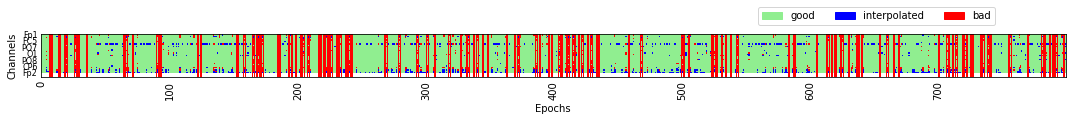

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\19\19_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.253350544371744
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\19\19_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.3604120468631745
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\19\19_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.7187035360889085
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\19\19_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.4090541395947836
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\19\19_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.5967851361207901
[G:\CDA Datasets\Hakim 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 773 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 773 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/773 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/773 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/773 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/773 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/773 [00:00<?,       ?it/s]

Dropped 178 epochs: 6, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 30, 46, 47, 48, 49, 50, 51, 53, 55, 58, 99, 105, 124, 130, 141, 142, 147, 154, 155, 156, 158, 167, 172, 177, 178, 179, 181, 182, 184, 186, 190, 196, 200, 207, 208, 209, 210, 211, 213, 217, 220, 221, 238, 240, 243, 244, 259, 262, 263, 267, 271, 281, 282, 294, 296, 298, 301, 303, 311, 317, 324, 331, 334, 344, 347, 349, 350, 360, 370, 375, 379, 383, 389, 396, 397, 399, 400, 404, 414, 415, 417, 419, 420, 438, 440, 449, 453, 457, 460, 462, 468, 471, 489, 491, 492, 505, 508, 510, 514, 516, 525, 530, 531, 532, 534, 539, 541, 550, 560, 576, 577, 578, 581, 582, 583, 585, 586, 588, 589, 590, 593, 594, 595, 615, 617, 618, 619, 620, 622, 640, 642, 648, 649, 676, 677, 678, 681, 691, 692, 693, 694, 700, 701, 702, 705, 714, 715, 716, 717, 718, 719, 721, 724, 727, 728, 730, 731, 733, 734, 735, 758, 765, 767, 772


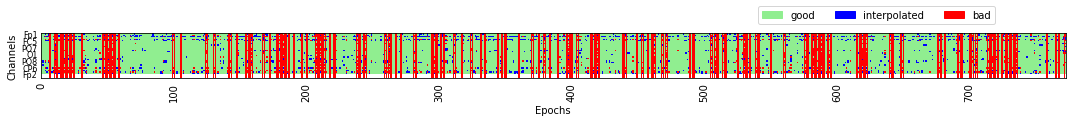

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\21\21_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.5547163531889954
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\21\21_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -1.3466373397022282
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\21\21_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 5.198475693263017
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\21\21_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 3.018563162601474
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\21\21_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.4029802838142227
[G:\CDA Datasets\Hakim

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 50 epochs: 29, 54, 83, 92, 100, 108, 114, 155, 160, 163, 183, 197, 198, 256, 329, 357, 364, 367, 371, 381, 384, 397, 455, 474, 476, 489, 498, 508, 509, 525, 550, 577, 585, 596, 622, 628, 643, 667, 672, 676, 680, 699, 706, 710, 720, 745, 754, 757, 783, 799


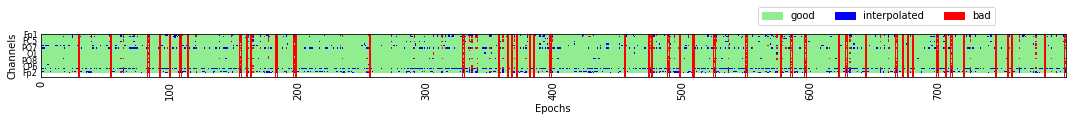

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\22\22_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.2466074004062466
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\22\22_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -1.6247791861829657
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\22\22_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.4602492984425712
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\22\22_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.2239866238186143
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\22\22_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.09465103598801626
[G:\CDA Datasets\Ha

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 39 epochs: 47, 53, 60, 88, 89, 91, 92, 119, 125, 181, 191, 193, 200, 242, 267, 287, 299, 321, 322, 329, 344, 385, 458, 471, 484, 510, 533, 539, 552, 561, 562, 569, 629, 662, 680, 746, 763, 782, 798


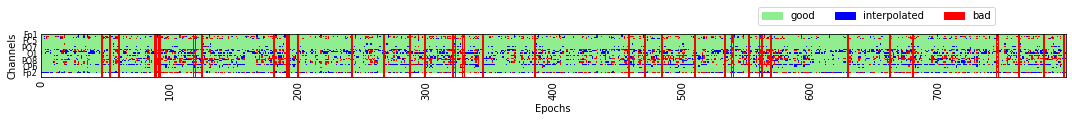

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\23\23_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.6197893761612165
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\23\23_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.9976538828803978
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\23\23_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.22037985924143258
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\23\23_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.24311415606282888
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\23\23_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.33238636626397156
[G:\CDA Datasets\H

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 83 epochs: 37, 41, 45, 46, 59, 76, 85, 92, 118, 127, 140, 143, 146, 147, 170, 171, 177, 209, 220, 228, 233, 248, 252, 254, 267, 269, 283, 284, 292, 293, 294, 331, 333, 334, 340, 348, 352, 356, 360, 361, 369, 379, 388, 393, 407, 426, 430, 442, 443, 457, 466, 467, 470, 477, 496, 497, 498, 506, 508, 517, 520, 525, 551, 569, 592, 598, 661, 662, 668, 674, 682, 691, 716, 718, 720, 722, 723, 729, 730, 731, 743, 749, 792


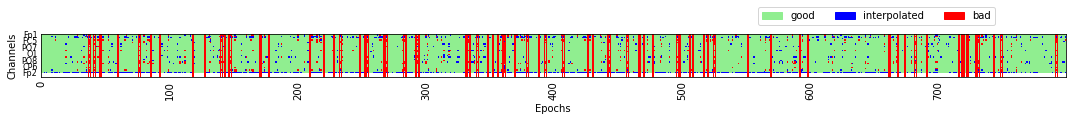

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\24\24_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.17426384345137738
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\24\24_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.6464700508512378
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\24\24_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.19031168331722342
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\24\24_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.9989780026643256
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\24\24_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.15567644232467162
[G:\CDA Datasets\

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 73 epochs: 6, 23, 33, 44, 47, 48, 62, 72, 81, 100, 102, 109, 112, 122, 131, 137, 167, 170, 172, 173, 177, 204, 210, 211, 212, 213, 225, 227, 234, 254, 258, 280, 291, 319, 339, 346, 348, 387, 389, 393, 405, 406, 410, 411, 438, 449, 462, 464, 466, 490, 513, 535, 538, 548, 552, 554, 579, 580, 584, 586, 607, 618, 658, 662, 669, 688, 726, 728, 733, 753, 766, 790, 793


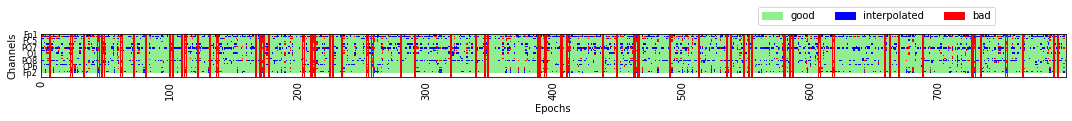

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\28\28_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.2023979388682651
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\28\28_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 2.1936873613516976
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\28\28_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.35696542079391186
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\28\28_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.05328608977949706
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\28\28_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.2382092145222845
[G:\CDA Datasets\Hak

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 294 epochs: 1, 2, 5, 8, 12, 15, 16, 24, 30, 31, 32, 34, 35, 36, 39, 40, 41, 42, 43, 44, 46, 50, 51, 52, 53, 54, 55, 56, 57, 61, 62, 64, 65, 67, 68, 69, 70, 74, 75, 76, 81, 82, 88, 89, 92, 93, 97, 100, 103, 105, 114, 122, 142, 154, 170, 171, 173, 174, 175, 177, 178, 179, 181, 182, 186, 187, 191, 203, 204, 211, 212, 213, 219, 221, 223, 224, 225, 226, 227, 232, 233, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 248, 249, 251, 252, 254, 255, 256, 257, 264, 265, 266, 267, 269, 273, 274, 275, 277, 278, 290, 294, 296, 297, 298, 299, 300, 303, 305, 306, 309, 310, 311, 313, 314, 315, 326, 327, 338, 368, 373, 374, 375, 376, 377, 378, 382, 384, 386, 402, 405, 408, 411, 413, 415, 418, 420, 421, 422, 425, 426, 429, 430, 431, 434, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 449, 450, 453, 454, 456, 457, 460, 463, 466, 467, 468, 474, 475, 479, 485, 491, 501, 505, 509, 523, 525, 531, 535, 536, 537, 540, 541, 542, 543, 544, 545, 548, 553, 555, 557, 561, 562, 564, 566, 568, 571, 5

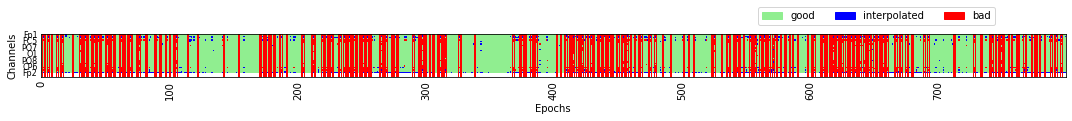

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\29\29_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -1.1880889766462868
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\29\29_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -1.4212327569775676
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\29\29_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.2768165410765628
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\29\29_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.024788242185308437
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\29\29_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -1.0368428709974302
[G:\CDA Datasets\H

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 191 epochs: 3, 6, 7, 9, 11, 12, 14, 16, 18, 22, 24, 28, 31, 35, 36, 38, 44, 46, 50, 52, 55, 56, 60, 61, 63, 66, 67, 68, 69, 71, 73, 74, 75, 76, 80, 81, 82, 92, 94, 96, 104, 113, 118, 119, 121, 124, 125, 127, 134, 141, 142, 143, 159, 162, 163, 164, 169, 170, 172, 175, 181, 186, 195, 200, 205, 206, 207, 209, 211, 212, 213, 217, 219, 224, 232, 233, 236, 238, 241, 243, 250, 254, 257, 263, 265, 266, 269, 270, 271, 274, 275, 279, 280, 281, 283, 284, 291, 292, 295, 298, 306, 307, 308, 321, 328, 333, 341, 349, 355, 366, 367, 379, 406, 408, 409, 419, 420, 421, 424, 427, 433, 434, 441, 443, 444, 447, 448, 452, 454, 462, 465, 473, 478, 480, 487, 492, 494, 495, 509, 523, 524, 527, 537, 541, 547, 554, 555, 573, 576, 577, 580, 583, 584, 595, 597, 600, 601, 609, 611, 615, 616, 618, 624, 625, 631, 633, 637, 646, 647, 652, 653, 655, 658, 661, 663, 667, 672, 678, 680, 692, 697, 698, 699, 700, 739, 759, 775, 788, 791, 792, 793


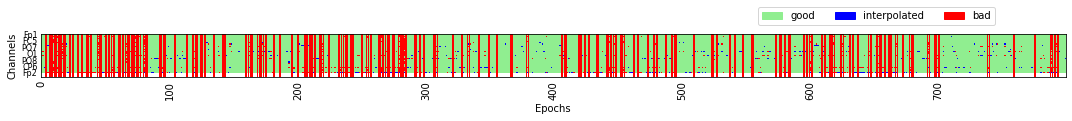

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\3\3_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 1.5157877406491078
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\3\3_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 3.926978909045967
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\3\3_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.7828291597692008
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\3\3_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.5979602283951858
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\3\3_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.7425792432126235
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\3\3_WM

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 438 epochs: 0, 2, 5, 7, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 41, 48, 52, 57, 59, 62, 64, 68, 69, 71, 75, 76, 77, 79, 82, 84, 88, 89, 91, 92, 93, 95, 96, 97, 98, 103, 106, 108, 109, 110, 111, 112, 113, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 129, 130, 133, 134, 137, 138, 139, 140, 142, 143, 146, 147, 148, 152, 153, 154, 155, 156, 161, 163, 164, 166, 167, 168, 169, 171, 175, 179, 180, 182, 183, 186, 187, 188, 189, 194, 195, 196, 198, 200, 201, 202, 203, 205, 206, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 242, 252, 254, 257, 267, 268, 270, 273, 274, 276, 279, 280, 281, 284, 287, 288, 293, 294, 295, 296, 301, 303, 304, 306, 308, 310, 311, 312, 313, 314, 316, 321, 322, 323, 324, 325, 326, 329, 330, 339, 341, 342, 344, 345, 347, 348, 352, 353, 355, 358, 363, 365, 366, 367, 374, 382, 383, 385, 387, 389, 390, 391, 392,

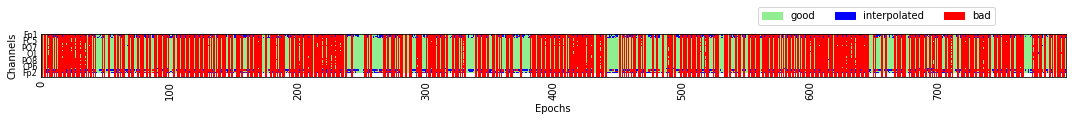

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\30\30_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.814468962992133
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\30\30_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.8545033852512284
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\30\30_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.17831554520482304
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\30\30_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.9859207167855537
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\30\30_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.4920525258986026
[G:\CDA Datasets\Hakim

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 103 epochs: 44, 67, 71, 85, 99, 114, 115, 116, 118, 120, 125, 131, 132, 135, 147, 149, 155, 157, 158, 159, 160, 163, 172, 178, 187, 258, 262, 271, 275, 278, 283, 284, 289, 298, 306, 311, 327, 329, 342, 352, 353, 354, 356, 360, 363, 369, 378, 383, 388, 389, 390, 403, 413, 437, 464, 470, 472, 490, 493, 497, 510, 511, 520, 523, 524, 536, 538, 546, 549, 550, 566, 588, 595, 599, 621, 640, 646, 650, 661, 662, 664, 666, 667, 668, 688, 691, 692, 717, 719, 726, 731, 733, 734, 738, 760, 762, 766, 767, 773, 781, 789, 791, 795


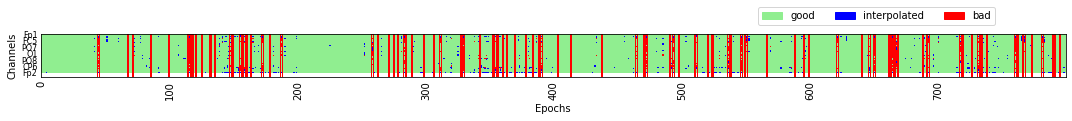

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.10322722031347827
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.33808922936213437
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.38340863107642864
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.6073512375524018
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\4\4_WM_att_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: -0.5983378223026374
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\4

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak', 'StimTrakAudio']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 4 misc channels 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 94 epochs: 7, 10, 13, 23, 24, 29, 44, 55, 68, 69, 70, 81, 95, 97, 98, 113, 149, 150, 177, 184, 204, 209, 211, 215, 217, 219, 222, 228, 230, 231, 247, 257, 284, 303, 307, 312, 313, 314, 353, 397, 399, 405, 409, 411, 414, 415, 418, 419, 430, 439, 453, 460, 473, 483, 495, 504, 513, 521, 525, 533, 553, 568, 574, 584, 594, 596, 599, 603, 605, 610, 615, 618, 627, 655, 657, 658, 665, 667, 669, 697, 716, 731, 733, 744, 751, 753, 763, 768, 769, 775, 781, 796, 797, 799


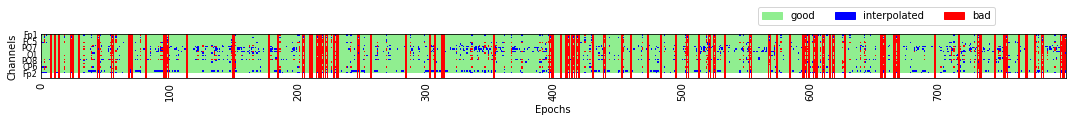

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\5\5_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.635192577938042
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\5\5_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.123858313318641
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\5\5_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.18775312347444598
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\5\5_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.877324162315851
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\5\5_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.25369079646639
[G:\CDA Datasets\Hakim 2019\Exp1b\EE

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 153 epochs: 8, 12, 19, 25, 28, 31, 32, 33, 35, 62, 90, 109, 110, 121, 123, 148, 157, 158, 159, 160, 177, 179, 180, 182, 191, 193, 194, 195, 201, 211, 223, 224, 225, 226, 228, 234, 243, 254, 257, 269, 272, 275, 284, 290, 296, 298, 300, 305, 307, 310, 312, 332, 339, 341, 345, 348, 351, 352, 353, 355, 365, 376, 378, 383, 396, 397, 418, 420, 422, 425, 426, 437, 438, 442, 447, 448, 491, 506, 512, 513, 515, 517, 518, 519, 522, 523, 525, 526, 539, 540, 541, 544, 545, 547, 555, 562, 566, 570, 572, 574, 575, 584, 590, 591, 592, 594, 605, 608, 613, 616, 618, 623, 624, 629, 631, 636, 641, 646, 653, 655, 670, 677, 679, 683, 685, 697, 704, 709, 711, 714, 715, 716, 717, 734, 736, 744, 745, 750, 754, 765, 767, 768, 772, 773, 774, 775, 780, 785, 787, 790, 791, 792, 795


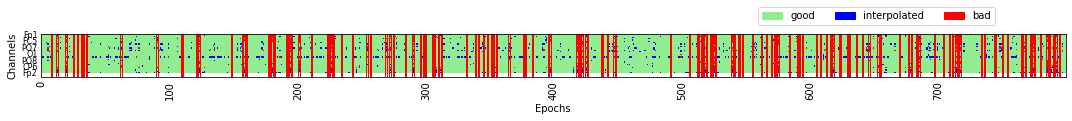

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\6\6_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.600348298134907
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\6\6_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.8887744948440223
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\6\6_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.19806440407690973
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\6\6_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.1805354829555654
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\6\6_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.11294033090046536
[G:\CDA Datasets\Hakim 2019\Ex

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=30


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 1 epoch: 552


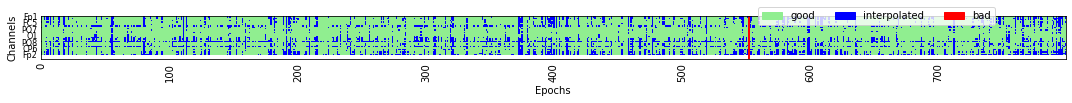

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\7\7_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.432812809090266
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\7\7_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -1.7638451083279283
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\7\7_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 0.6418594305788374
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\7\7_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.1142266717743994
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\7\7_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.2230822440099865
[G:\CDA Datasets\Hakim 2019\Exp1b

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 523 epochs: 0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 22, 23, 24, 25, 27, 29, 30, 32, 34, 35, 37, 39, 41, 43, 44, 48, 49, 55, 59, 61, 62, 63, 64, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 91, 92, 95, 97, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 162, 163, 167, 169, 171, 173, 175, 176, 181, 183, 184, 185, 186, 187, 188, 189, 191, 194, 195, 196, 197, 200, 201, 202, 203, 205, 206, 207, 208, 209, 213, 214, 215, 216, 217, 220, 221, 222, 223, 224, 225, 228, 232, 234, 235, 237, 238, 239, 241, 243, 246, 248, 250, 251, 254, 255, 256, 257, 259, 261, 263, 265, 266, 267, 269, 270, 271, 272, 274, 275, 277, 278, 280, 281, 282, 285, 289, 292, 294, 295, 297, 298, 299, 300, 301, 302, 303, 304, 305, 310, 311, 312, 313, 314, 315, 316, 318, 319,

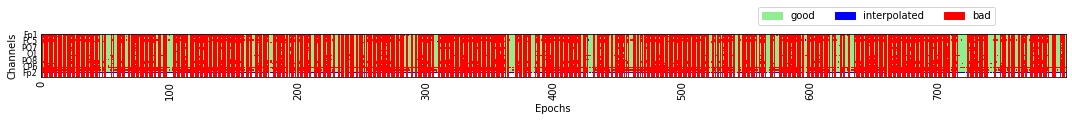

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\8\8_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: -0.030396156570091308
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\8\8_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.24516010854213272
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\8\8_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: 1.199033001915454
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\8\8_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.5256173355256454
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\8\8_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 0.34866590538041015
[G:\CDA Datasets\Hakim 2019

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 449 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16, 18, 19, 20, 24, 25, 35, 37, 39, 41, 44, 46, 48, 49, 51, 52, 54, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 93, 98, 103, 106, 111, 116, 117, 119, 120, 123, 124, 125, 128, 129, 130, 134, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 160, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 177, 178, 179, 181, 182, 183, 184, 185, 187, 188, 189, 191, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 213, 214, 216, 220, 221, 223, 225, 227, 229, 230, 231, 232, 237, 240, 241, 249, 254, 256, 258, 262, 266, 267, 269, 270, 271, 274, 275, 276, 277, 281, 282, 283, 284, 285, 286, 287, 289, 290, 292, 294, 299, 305, 306, 307, 310, 313, 315, 317, 319, 321, 322, 323, 324, 327, 328, 329, 332, 334, 337, 338, 339, 340, 341, 342, 343, 344, 347, 348, 349, 350, 353, 355, 356, 357, 359, 360, 361, 363, 365, 366, 367, 368

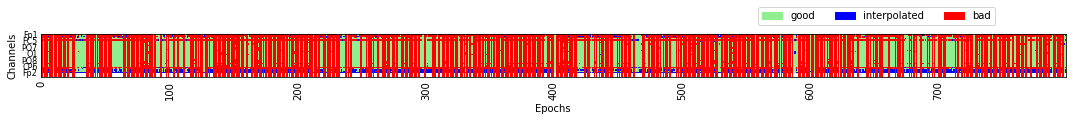

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\9\9_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-good: 0.6999562551666323
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\9\9_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-left-bad: 3.018032887642846
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\9\9_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 2-right-good: -0.030318580242849554
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\9\9_WM_att_V2_NHKA.vhdr] Skipping: 2-right-bad
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\9\9_WM_att_V2_NHKA.vhdr] Adding Mean CDA Amp for 4-left-good: 1.7553872135852822
[G:\CDA Datasets\Hakim 2019\Exp1b\EEGData\9\9_WM_att_V2_NHKA.vhdr

D:\PhD\CDA-review\studies\cda_utils.py:224: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
D:\PhD\CDA-review\studies\cda_utils.py:235: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
D:\PhD\CDA-review\studies\cda_utils.py:246: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


Processing: G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\1\1_KiNi3.vhdr...
Extracting parameters from G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\1\1_KiNi3.vhdr...
Setting channel info structure...
Reading 0 ... 4206829  =      0.000 ...  8413.658 secs...


<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 3 epochs: 8, 376, 505


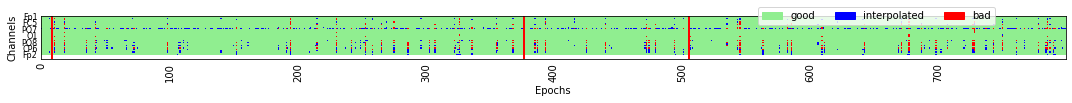

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\1\1_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.8986464005196785
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\1\1_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.1312903151424785
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\1\1_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: -0.3137824316480216
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\1\1_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.18852467812983986
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\1\1_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 1.838592566140337
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\1\1_KiNi3.vhdr] Adding Mean CDA Amp

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 108 epochs: 1, 2, 3, 4, 5, 7, 10, 12, 27, 28, 29, 31, 32, 46, 51, 52, 53, 65, 69, 87, 90, 91, 92, 103, 104, 105, 120, 125, 142, 175, 178, 187, 203, 204, 205, 214, 215, 217, 221, 232, 235, 236, 237, 241, 283, 287, 291, 294, 298, 299, 300, 301, 302, 304, 305, 306, 307, 310, 311, 321, 333, 375, 378, 381, 398, 402, 403, 404, 407, 408, 421, 426, 427, 431, 450, 462, 464, 476, 478, 486, 524, 539, 545, 546, 547, 551, 562, 603, 613, 620, 627, 630, 633, 639, 661, 672, 683, 684, 685, 686, 689, 690, 701, 705, 748, 779, 781, 785


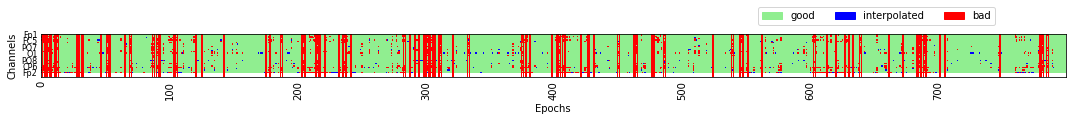

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\10\10_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.6819752743778812
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\10\10_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.4189874445395332
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\10\10_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 1.2931987379627712
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\10\10_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.5483583374876364
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\10\10_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 0.9436391009269446
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\10\10_KiNi3.vhdr] Adding M

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 120 epochs: 8, 36, 40, 52, 58, 80, 92, 100, 104, 109, 116, 117, 127, 129, 130, 131, 134, 158, 164, 169, 177, 183, 184, 187, 195, 197, 198, 236, 245, 247, 261, 262, 264, 265, 277, 291, 297, 298, 321, 338, 341, 346, 348, 363, 366, 396, 397, 400, 410, 415, 419, 422, 426, 427, 431, 432, 433, 440, 446, 447, 453, 455, 456, 457, 467, 489, 497, 506, 507, 517, 524, 534, 540, 541, 548, 553, 554, 563, 564, 566, 569, 578, 585, 586, 589, 612, 616, 625, 627, 631, 632, 642, 643, 645, 649, 653, 654, 655, 656, 658, 665, 675, 685, 689, 693, 698, 705, 716, 725, 734, 737, 749, 753, 756, 762, 768, 769, 774, 778, 785


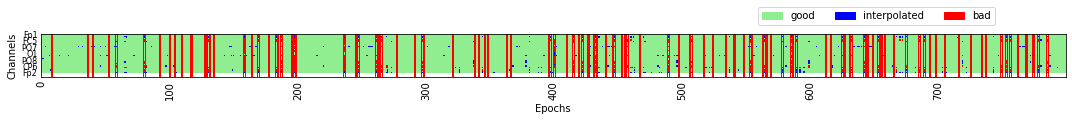

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\11\11_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 1.0938440105620326
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\11\11_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.5740236514756855
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\11\11_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: -0.14285815015483583
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\11\11_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.6999091111018028
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\11\11_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 0.9994607334480667
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\11\11_KiNi3.vhdr] Addin

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=30


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


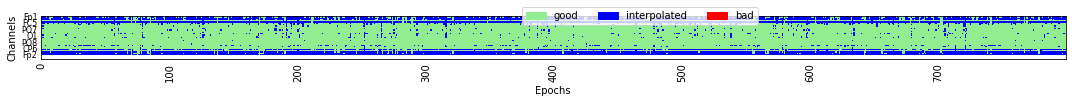

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\12\12_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.01524046862043387
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\12\12_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.18913377366954984
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\12\12_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: -1.6208955668458669
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\12\12_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.0956885887822062
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\12\12_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 0.9758571839966755
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\12\12_KiNi3.vhdr] Addin

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 593 epochs: 0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 62, 64, 65, 67, 68, 70, 71, 72, 73, 75, 79, 80, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 108, 111, 113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 147, 148, 150, 151, 152, 154, 155, 156, 157, 159, 160, 163, 167, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 190, 191, 192, 195, 196, 197, 198, 199, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 230, 231, 232, 233, 234, 235, 236, 238, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 260, 261, 265, 266, 267, 268, 269, 271, 272, 273, 274, 275, 276, 278, 279, 280, 2

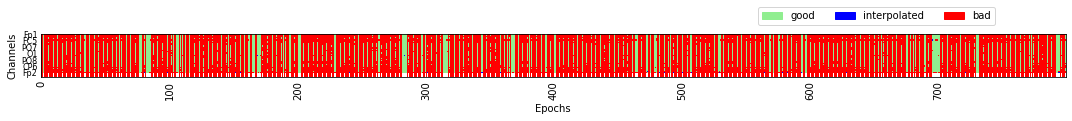

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\13\13_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: -0.07351627826329316
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\13\13_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.5725447782929156
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\13\13_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 0.8070686522926899
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\13\13_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.9950948762144762
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\13\13_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 0.25007961080794555
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\13\13_KiNi3.vhdr] Addi

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 224 epochs: 3, 5, 6, 9, 11, 15, 18, 20, 21, 22, 24, 26, 31, 35, 39, 43, 46, 48, 50, 53, 55, 56, 58, 62, 64, 71, 75, 83, 90, 91, 95, 96, 101, 102, 109, 110, 111, 112, 115, 117, 118, 119, 121, 126, 127, 129, 147, 153, 163, 168, 170, 171, 172, 174, 180, 183, 187, 194, 201, 202, 203, 204, 207, 209, 216, 217, 220, 223, 230, 234, 237, 247, 251, 255, 263, 268, 273, 277, 280, 287, 290, 292, 303, 304, 308, 311, 313, 314, 315, 318, 323, 337, 338, 343, 347, 354, 357, 358, 359, 361, 368, 373, 374, 375, 377, 378, 379, 395, 396, 399, 400, 408, 409, 413, 414, 415, 417, 418, 420, 426, 427, 428, 432, 456, 467, 474, 477, 485, 486, 487, 488, 489, 493, 494, 496, 501, 502, 504, 508, 510, 511, 513, 514, 517, 525, 529, 532, 535, 536, 537, 543, 547, 548, 550, 552, 556, 557, 558, 568, 571, 573, 579, 582, 585, 599, 600, 602, 604, 606, 607, 609, 611, 612, 614, 616, 617, 619, 624, 631, 632, 637, 638, 640, 642, 643, 655, 660, 667, 669, 670, 672, 674, 676, 677, 679, 680, 699, 702, 712, 713, 714, 715, 720, 7

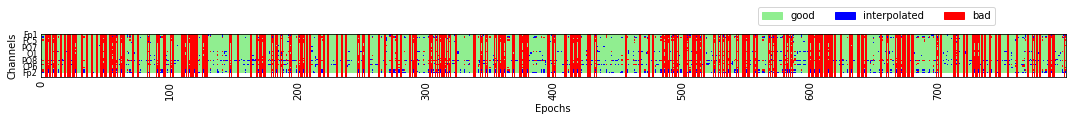

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\15\15_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: -0.02260899439495118
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\15\15_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: -1.004575068377337
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\15\15_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 1.6549184839061328
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\15\15_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.9577946148536131
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\15\15_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 0.12758983309708477
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\15\15_KiNi3.vhdr] Addin

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 151 epochs: 22, 47, 52, 60, 68, 86, 90, 91, 92, 98, 104, 105, 106, 107, 111, 112, 113, 114, 115, 116, 119, 120, 123, 124, 126, 127, 131, 132, 137, 138, 141, 142, 147, 149, 152, 155, 164, 178, 187, 190, 193, 199, 243, 250, 256, 258, 259, 263, 267, 268, 271, 273, 278, 282, 287, 291, 300, 306, 313, 318, 335, 336, 338, 350, 352, 353, 355, 359, 362, 363, 365, 367, 369, 370, 375, 386, 392, 393, 396, 399, 418, 436, 447, 448, 455, 456, 467, 471, 475, 476, 487, 488, 491, 492, 493, 494, 497, 510, 512, 515, 520, 531, 538, 541, 574, 585, 591, 592, 619, 620, 628, 636, 643, 655, 657, 659, 662, 666, 670, 682, 683, 689, 693, 697, 698, 700, 706, 713, 717, 718, 722, 728, 735, 739, 758, 763, 767, 770, 773, 774, 779, 780, 781, 783, 784, 785, 786, 787, 792, 793, 799


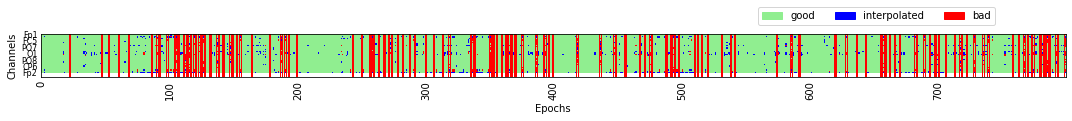

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\16\16_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.8632130292074613
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\16\16_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.3227877688592529
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\16\16_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 1.1150140770826176
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\16\16_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.45425060988087734
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\16\16_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 1.619194593352546
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\16\16_KiNi3.vhdr] Adding M

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 190 epochs: 1, 4, 13, 14, 21, 22, 37, 50, 52, 54, 61, 62, 66, 74, 77, 86, 95, 103, 104, 105, 109, 117, 123, 125, 126, 129, 131, 132, 143, 146, 153, 161, 163, 170, 174, 180, 181, 184, 186, 200, 202, 203, 204, 205, 206, 212, 213, 216, 217, 219, 240, 241, 242, 243, 267, 268, 270, 271, 272, 277, 281, 290, 292, 296, 297, 307, 314, 319, 320, 323, 325, 336, 338, 340, 343, 346, 356, 357, 359, 365, 367, 370, 371, 372, 385, 387, 388, 390, 395, 403, 404, 408, 409, 412, 413, 414, 417, 420, 430, 431, 432, 441, 447, 458, 463, 469, 471, 472, 474, 481, 483, 496, 501, 502, 505, 511, 512, 513, 521, 523, 524, 525, 536, 542, 545, 552, 553, 554, 558, 568, 569, 575, 578, 579, 580, 587, 588, 589, 590, 593, 595, 597, 602, 603, 604, 607, 614, 615, 616, 617, 622, 623, 631, 640, 643, 644, 645, 646, 654, 655, 657, 663, 665, 670, 681, 683, 685, 694, 695, 700, 707, 712, 713, 715, 718, 722, 723, 724, 726, 728, 733, 736, 737, 738, 747, 755, 786, 787, 788, 792


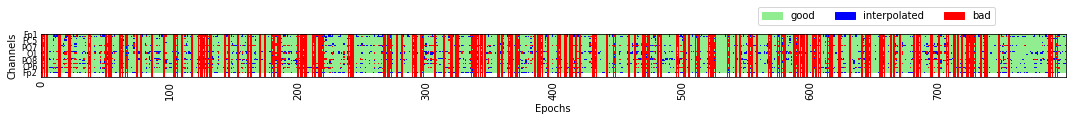

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\17\17_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.27742122530777236
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\17\17_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.5692207619444257
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\17\17_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 0.24075248838939586
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\17\17_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.3748469806988346
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\17\17_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: -0.03996731959502008
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\17\17_KiNi3.vhdr] Add

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 56 epochs: 39, 40, 60, 94, 111, 121, 139, 142, 160, 161, 187, 188, 190, 204, 207, 220, 260, 264, 310, 312, 315, 317, 368, 373, 383, 413, 417, 421, 437, 443, 451, 452, 456, 473, 485, 530, 531, 532, 555, 580, 610, 626, 629, 634, 646, 657, 670, 694, 702, 718, 719, 746, 748, 756, 768, 796


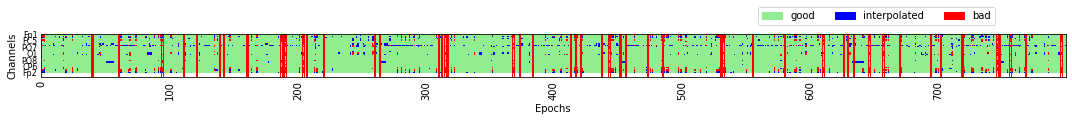

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\18\18_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.18344513712748098
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\18\18_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.6753469199929591
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\18\18_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 0.5173058613110717
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\18\18_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.3113381749951413
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\18\18_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 0.8492576348836344
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\18\18_KiNi3.vhdr] Adding

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 37 epochs: 3, 11, 15, 19, 57, 67, 70, 71, 75, 91, 94, 115, 116, 154, 204, 205, 218, 274, 277, 288, 291, 301, 319, 322, 424, 463, 471, 482, 488, 497, 504, 582, 600, 601, 662, 677, 761


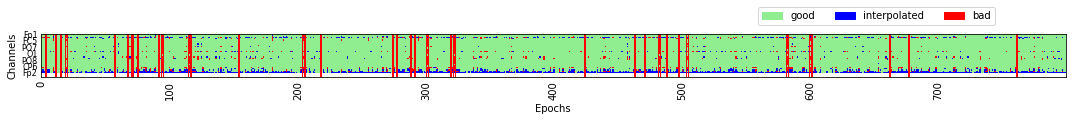

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\19\19_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 1.5444637199154638
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\19\19_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.7698255024868184
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\19\19_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 1.5619994322508381
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\19\19_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.5490889534048644
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\19\19_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 2.58192182104495
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\19\19_KiNi3.vhdr] Adding Mea

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 329 epochs: 0, 1, 2, 7, 8, 15, 16, 19, 20, 28, 35, 37, 39, 40, 42, 44, 45, 46, 47, 48, 49, 52, 55, 57, 58, 59, 60, 61, 63, 65, 66, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 82, 87, 89, 90, 92, 94, 99, 106, 120, 121, 134, 140, 142, 143, 145, 147, 148, 153, 154, 160, 161, 165, 167, 173, 174, 176, 177, 178, 181, 184, 186, 187, 189, 191, 196, 199, 200, 202, 208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 225, 227, 230, 234, 235, 236, 237, 238, 239, 241, 242, 243, 245, 248, 249, 250, 251, 253, 254, 256, 257, 258, 259, 261, 262, 263, 264, 266, 268, 271, 273, 276, 278, 280, 283, 284, 285, 287, 289, 292, 298, 302, 306, 311, 321, 322, 323, 325, 328, 329, 330, 333, 334, 335, 338, 344, 347, 351, 352, 354, 357, 358, 359, 362, 364, 367, 369, 373, 375, 378, 380, 381, 382, 384, 385, 391, 392, 408, 409, 410, 412, 422, 424, 425, 427, 429, 430, 432, 434, 435, 436, 437, 438, 439, 442, 445, 447, 448, 449, 452, 453, 455, 457, 461, 463, 465, 466, 468, 469, 481, 488, 489, 497, 499, 506, 507

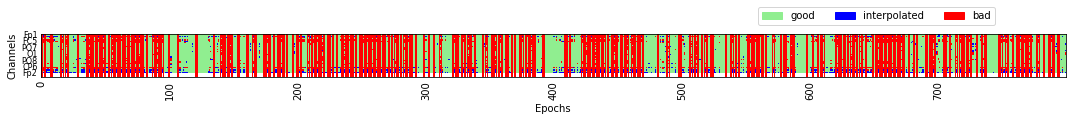

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\2\2_2_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 2.949523391715435
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\2\2_2_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 2.893338608462547
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\2\2_2_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: -1.827542812975398
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\2\2_2_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -2.638496295656613
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\2\2_2_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 3.8261800625724263
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\2\2_2_KiNi3.vhdr] Adding Mea

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 172 epochs: 13, 22, 25, 26, 33, 34, 36, 37, 38, 40, 42, 48, 50, 53, 54, 57, 58, 61, 64, 65, 68, 70, 72, 73, 74, 88, 99, 108, 130, 136, 139, 146, 150, 155, 158, 159, 175, 176, 189, 193, 196, 197, 198, 203, 220, 226, 234, 242, 243, 244, 245, 247, 257, 261, 263, 264, 266, 267, 268, 271, 274, 275, 279, 282, 283, 285, 308, 320, 322, 334, 337, 341, 346, 348, 352, 353, 354, 359, 362, 372, 376, 379, 382, 387, 390, 395, 398, 410, 421, 431, 437, 438, 445, 446, 452, 461, 462, 466, 467, 468, 470, 477, 479, 480, 481, 482, 483, 488, 489, 492, 494, 496, 500, 517, 523, 527, 530, 534, 541, 545, 548, 549, 559, 561, 562, 563, 568, 569, 570, 581, 585, 586, 593, 612, 621, 622, 626, 628, 629, 634, 637, 646, 649, 652, 655, 656, 665, 673, 675, 676, 679, 680, 686, 689, 691, 693, 694, 695, 711, 726, 731, 740, 746, 757, 758, 778, 779, 780, 781, 784, 790, 793


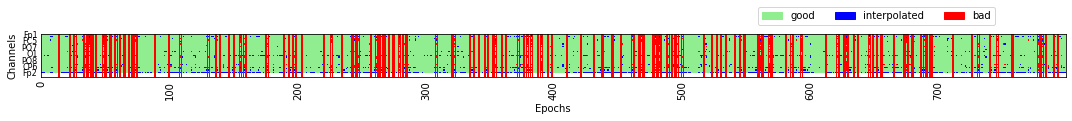

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\20\20_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: -0.5022491455315384
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\20\20_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.1812987960551956
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\20\20_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 0.13969684572413074
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\20\20_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.0102511483835817
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\20\20_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 0.44210865540459215
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\20\20_KiNi3.vhdr] Add

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 360 epochs: 0, 1, 2, 3, 9, 10, 11, 12, 13, 14, 15, 16, 27, 31, 33, 35, 41, 45, 46, 48, 52, 54, 55, 60, 61, 62, 63, 64, 66, 67, 68, 71, 72, 73, 75, 79, 83, 87, 88, 91, 92, 101, 108, 109, 110, 112, 113, 114, 115, 120, 124, 125, 127, 128, 129, 133, 134, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 171, 172, 174, 176, 177, 178, 180, 181, 183, 184, 185, 186, 190, 191, 194, 195, 196, 204, 206, 207, 209, 211, 212, 218, 219, 220, 222, 223, 227, 230, 234, 242, 249, 250, 251, 253, 254, 257, 258, 259, 263, 265, 266, 269, 272, 273, 274, 275, 276, 280, 281, 286, 289, 290, 292, 295, 296, 297, 298, 299, 300, 302, 303, 304, 308, 311, 312, 315, 320, 322, 327, 330, 331, 334, 335, 338, 339, 341, 345, 347, 348, 350, 351, 354, 357, 358, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 374, 380, 381, 384, 388, 389, 390, 393, 394, 397, 398, 399, 408, 409, 410, 412, 421, 426, 429, 431, 435, 4

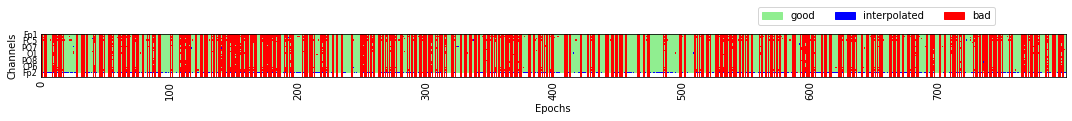

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\22\22_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.3954916884481621
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\22\22_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.11208896782535119
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\22\22_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 0.257265207496661
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\22\22_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.8777267536264267
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\22\22_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 1.2943418015924202
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\22\22_KiNi3.vhdr] Adding 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 285 epochs: 1, 5, 6, 9, 11, 13, 14, 15, 16, 17, 18, 24, 29, 40, 42, 43, 51, 52, 53, 54, 56, 64, 65, 68, 69, 72, 77, 79, 83, 84, 85, 86, 87, 88, 91, 92, 97, 99, 100, 101, 107, 109, 117, 119, 121, 124, 126, 128, 130, 135, 140, 143, 144, 148, 149, 159, 160, 164, 165, 166, 167, 173, 174, 177, 179, 180, 183, 184, 186, 187, 188, 189, 191, 193, 195, 199, 205, 208, 215, 218, 219, 221, 223, 224, 228, 230, 231, 233, 239, 242, 243, 245, 246, 252, 253, 259, 264, 271, 272, 278, 283, 284, 286, 288, 289, 292, 296, 305, 308, 311, 327, 333, 339, 340, 342, 343, 345, 346, 348, 349, 353, 356, 362, 365, 368, 369, 370, 372, 374, 375, 381, 382, 386, 388, 390, 392, 395, 399, 401, 404, 405, 411, 413, 418, 420, 424, 425, 426, 427, 431, 433, 437, 441, 442, 447, 448, 450, 453, 457, 459, 460, 461, 462, 467, 469, 471, 472, 475, 479, 480, 481, 483, 486, 490, 492, 493, 495, 497, 499, 503, 506, 507, 509, 512, 514, 521, 522, 523, 524, 525, 529, 534, 540, 542, 546, 547, 553, 554, 555, 558, 561, 562, 563, 568, 57

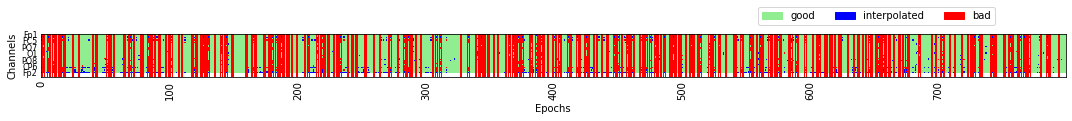

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\3\3_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.32888846416605233
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\3\3_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.1564231276532597
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\3\3_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 0.45503472455853533
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\3\3_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.0568173785365698
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\3\3_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: -0.46657483957917306
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\3\3_KiNi3.vhdr] Adding Mean CDA 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 62 epochs: 27, 30, 32, 43, 76, 77, 80, 84, 87, 127, 140, 145, 151, 155, 165, 170, 193, 229, 277, 284, 317, 328, 347, 359, 369, 378, 400, 422, 452, 503, 515, 517, 520, 533, 552, 578, 588, 589, 599, 603, 611, 632, 657, 660, 671, 675, 686, 687, 692, 693, 722, 726, 727, 732, 734, 740, 749, 765, 779, 782, 786, 787


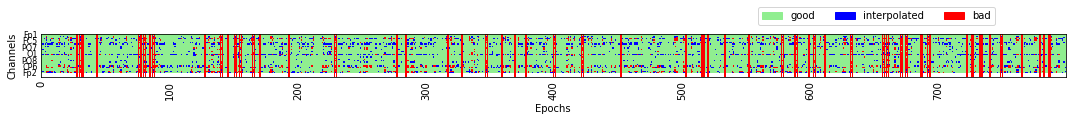

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\4\4_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: -0.747587868898363
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\4\4_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.34108275582294606
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\4\4_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 0.8980778681573999
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\4\4_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.165041033626107
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\4\4_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: -0.22627398900640505
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\4\4_KiNi3.vhdr] Adding Mean CDA A

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 327 epochs: 0, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 25, 26, 28, 29, 31, 36, 37, 46, 50, 51, 52, 62, 64, 65, 66, 69, 70, 71, 75, 77, 79, 84, 85, 86, 88, 90, 93, 94, 95, 96, 98, 99, 101, 102, 103, 104, 107, 110, 117, 118, 120, 121, 123, 127, 128, 129, 130, 139, 143, 144, 146, 147, 149, 153, 154, 155, 156, 157, 159, 168, 169, 173, 174, 177, 182, 183, 185, 194, 195, 197, 199, 200, 201, 204, 206, 207, 209, 212, 213, 214, 218, 219, 221, 222, 225, 226, 227, 229, 230, 238, 240, 241, 248, 251, 252, 253, 254, 259, 260, 263, 264, 265, 267, 269, 272, 275, 276, 277, 278, 280, 284, 285, 291, 297, 298, 299, 301, 302, 305, 308, 310, 311, 315, 316, 320, 322, 327, 328, 330, 331, 333, 334, 335, 336, 337, 338, 342, 347, 349, 350, 353, 355, 356, 357, 358, 359, 360, 362, 364, 366, 367, 368, 369, 370, 373, 376, 382, 385, 386, 388, 392, 393, 394, 396, 399, 404, 405, 408, 411, 412, 413, 414, 415, 416, 419, 422, 426, 428, 433, 438, 441, 442, 443, 448, 449, 450, 451, 465, 466, 467, 468, 472, 478, 

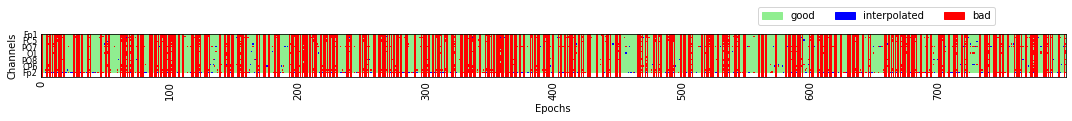

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\5\5_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: -1.073715756040443
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\5\5_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: -1.2141619103825465
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\5\5_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: -0.1504485867693574
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\5\5_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.5977552655613241
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\5\5_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: -2.080453324989704
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\5\5_KiNi3.vhdr] Adding Mean CDA A

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 103 epochs: 15, 17, 63, 68, 69, 100, 103, 107, 111, 113, 115, 116, 149, 158, 159, 160, 161, 164, 166, 173, 176, 177, 188, 197, 208, 219, 252, 253, 258, 280, 310, 313, 314, 320, 338, 342, 344, 347, 348, 350, 352, 358, 368, 369, 372, 373, 374, 383, 398, 441, 470, 472, 473, 475, 476, 480, 487, 492, 511, 517, 518, 519, 522, 523, 525, 528, 529, 532, 534, 535, 536, 537, 538, 540, 541, 548, 549, 569, 576, 591, 593, 594, 600, 603, 604, 657, 661, 675, 680, 684, 691, 724, 730, 731, 732, 733, 739, 747, 770, 773, 774, 789, 791


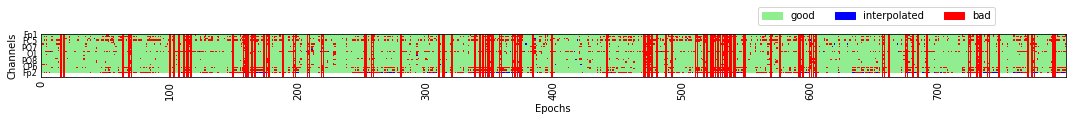

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\6\6_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.930135790209379
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\6\6_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.7141450235396403
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\6\6_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: -0.29925586522738173
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\6\6_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.1774818935509327
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\6\6_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 1.0590297841969778
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\6\6_KiNi3.vhdr] Adding Mean CDA Am

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 122 epochs: 27, 30, 35, 36, 37, 42, 43, 46, 50, 51, 52, 53, 56, 70, 72, 114, 117, 121, 126, 147, 149, 156, 182, 217, 230, 233, 236, 250, 254, 255, 257, 258, 259, 260, 264, 265, 266, 267, 268, 269, 270, 274, 276, 282, 283, 286, 287, 306, 324, 343, 344, 348, 350, 352, 358, 359, 372, 381, 382, 384, 385, 386, 426, 429, 430, 431, 444, 453, 454, 456, 460, 463, 464, 487, 490, 532, 534, 537, 539, 547, 548, 549, 562, 572, 577, 590, 598, 607, 616, 617, 619, 620, 624, 633, 640, 642, 644, 646, 648, 649, 651, 652, 653, 655, 657, 667, 669, 672, 692, 695, 696, 701, 740, 744, 757, 764, 765, 768, 781, 795, 797, 799


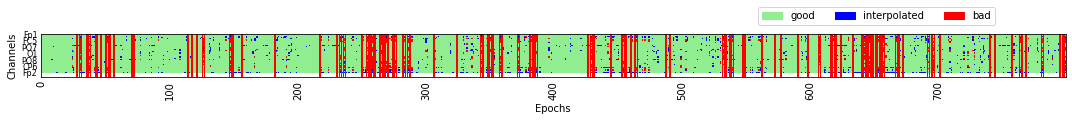

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\7\7_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.5592139744573031
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\7\7_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.6821534825870686
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\7\7_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: -0.8241037317860421
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\7\7_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.6803535809786474
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\7\7_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 0.6478946016107084
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\7\7_KiNi3.vhdr] Adding Mean CDA Am

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 72 epochs: 13, 38, 44, 48, 80, 90, 95, 96, 112, 118, 123, 124, 127, 131, 142, 145, 171, 174, 185, 235, 237, 238, 264, 273, 276, 280, 300, 301, 304, 324, 331, 335, 340, 348, 354, 355, 362, 382, 384, 388, 391, 392, 431, 442, 452, 454, 457, 468, 483, 485, 506, 530, 539, 559, 571, 588, 614, 617, 629, 636, 637, 638, 641, 652, 687, 695, 696, 708, 743, 752, 786, 795


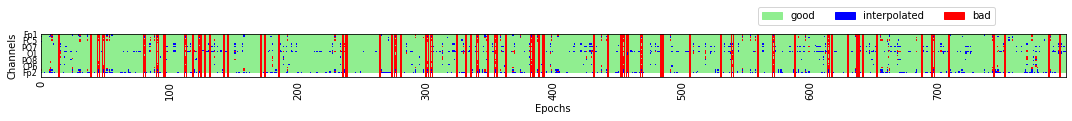

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\8\8_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 0.7381659054582349
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\8\8_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.538336787072575
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\8\8_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 0.8408151863740388
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\8\8_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.5930876172405102
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\8\8_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 0.8188769880796422
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\8\8_KiNi3.vhdr] Adding Mean CDA Amp f

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 149 epochs: 3, 12, 14, 15, 21, 23, 24, 25, 30, 31, 35, 38, 45, 53, 56, 61, 63, 67, 69, 78, 88, 89, 99, 100, 105, 121, 127, 132, 145, 146, 147, 148, 150, 151, 154, 156, 160, 161, 177, 197, 204, 207, 224, 226, 231, 237, 239, 243, 251, 264, 269, 273, 277, 282, 290, 293, 300, 301, 304, 308, 309, 329, 330, 331, 332, 333, 339, 347, 348, 350, 352, 364, 365, 382, 384, 385, 386, 387, 392, 393, 398, 402, 409, 418, 425, 428, 429, 430, 440, 441, 450, 454, 458, 469, 473, 478, 479, 480, 499, 507, 514, 515, 523, 528, 530, 532, 544, 545, 546, 554, 556, 561, 569, 577, 579, 590, 594, 599, 605, 624, 629, 637, 657, 658, 660, 662, 667, 680, 701, 708, 709, 710, 713, 717, 728, 738, 740, 744, 754, 765, 768, 770, 772, 773, 776, 780, 781, 786, 799


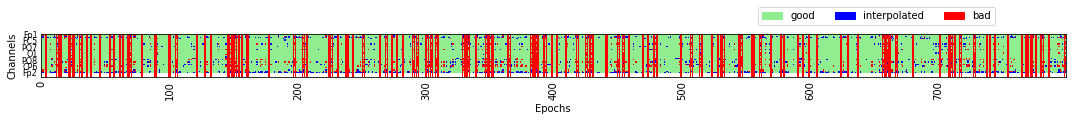

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\9\9_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-good: 1.0242320545396755
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\9\9_KiNi3.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.6583524845748182
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\9\9_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-good: 0.25903661595325855
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\9\9_KiNi3.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.314679295560314
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\9\9_KiNi3.vhdr] Adding Mean CDA Amp for 4-left-good: 1.194346242999068
[G:\CDA Datasets\Hakim 2019\Exp2a\EEGData\9\9_KiNi3.vhdr] Adding Mean CDA Amp f

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 235 epochs: 6, 7, 16, 23, 28, 34, 48, 49, 50, 51, 53, 56, 57, 59, 62, 65, 66, 67, 68, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 93, 105, 106, 107, 111, 121, 123, 124, 140, 146, 147, 148, 149, 156, 160, 162, 183, 186, 187, 199, 200, 201, 206, 219, 236, 242, 245, 253, 257, 262, 265, 266, 267, 268, 269, 271, 272, 273, 274, 275, 276, 278, 279, 280, 281, 283, 284, 285, 286, 287, 289, 292, 293, 299, 300, 302, 303, 306, 307, 319, 340, 342, 344, 345, 346, 349, 353, 354, 356, 358, 361, 362, 363, 368, 371, 372, 375, 385, 388, 389, 394, 399, 400, 407, 420, 423, 426, 427, 438, 440, 444, 445, 447, 448, 449, 450, 453, 457, 459, 464, 466, 467, 470, 472, 473, 474, 475, 476, 478, 479, 481, 483, 484, 485, 491, 496, 498, 508, 515, 516, 518, 523, 527, 529, 531, 534, 539, 543, 544, 545, 546, 547, 555, 573, 575, 576, 579, 580, 582, 584, 587, 589, 594, 600, 621, 634, 635, 639, 649, 652, 653, 657, 658, 660, 663, 664, 665, 666, 667, 669, 670, 671, 672, 673, 675, 676, 679, 683, 685, 686, 6

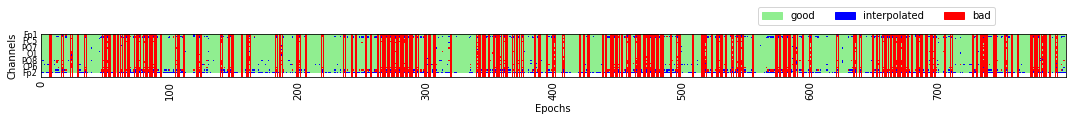

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\1\1_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.8800400740829231
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\1\1_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.028025305565294735
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\1\1_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.25282111551024267
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\1\1_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.03367166093694108
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\1\1_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.0831868430984637
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\1\1_KiNi4.vhdr] Adding Mean CDA 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 65 epochs: 23, 25, 63, 64, 86, 95, 105, 111, 124, 132, 140, 151, 153, 165, 170, 195, 202, 216, 227, 266, 278, 293, 296, 298, 318, 320, 327, 330, 339, 349, 370, 388, 389, 394, 401, 407, 417, 432, 461, 467, 482, 485, 488, 492, 495, 529, 547, 583, 595, 607, 614, 619, 635, 637, 647, 654, 675, 684, 698, 702, 741, 742, 751, 769, 795


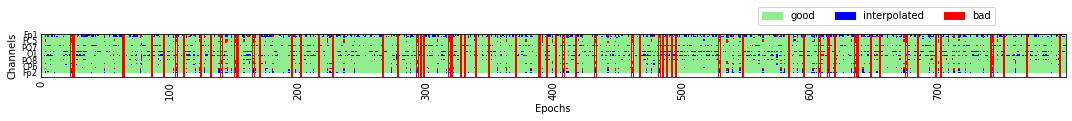

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\10\10_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.7166956923751575
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\10\10_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.4892286921953954
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\10\10_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -0.6311189386139434
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\10\10_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.067348732690238
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\10\10_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 0.8109769945059554
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\10\10_KiNi4.vhdr] Adding 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 131 epochs: 8, 9, 11, 13, 15, 20, 23, 24, 26, 28, 29, 33, 34, 37, 42, 43, 47, 49, 59, 78, 85, 91, 95, 101, 104, 116, 122, 130, 148, 163, 167, 191, 199, 203, 207, 209, 211, 215, 220, 225, 228, 232, 245, 246, 255, 262, 263, 269, 272, 276, 289, 291, 292, 295, 328, 338, 344, 373, 377, 380, 395, 399, 400, 405, 407, 408, 412, 417, 422, 423, 424, 426, 430, 434, 438, 440, 441, 442, 443, 454, 461, 464, 465, 470, 473, 474, 480, 490, 491, 499, 504, 523, 538, 546, 552, 565, 566, 569, 591, 593, 594, 611, 621, 624, 628, 630, 632, 634, 637, 646, 653, 658, 659, 661, 665, 666, 667, 671, 675, 680, 716, 726, 742, 743, 744, 754, 755, 763, 766, 770, 791


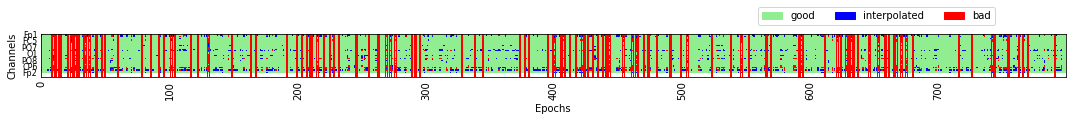

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\11\11_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.0683254450725734
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\11\11_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.03628063459021413
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\11\11_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.14910146530830273
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\11\11_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.3131846003227701
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\11\11_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 2.3503135231840675
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\11\11_KiNi4.vhdr] Addi

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 116 epochs: 2, 3, 9, 12, 22, 79, 81, 87, 105, 125, 127, 128, 136, 139, 140, 143, 153, 168, 169, 179, 198, 216, 231, 234, 244, 265, 268, 271, 284, 285, 288, 289, 291, 305, 339, 341, 346, 353, 354, 357, 362, 368, 369, 370, 371, 381, 382, 385, 390, 396, 402, 405, 407, 410, 425, 430, 432, 445, 454, 455, 460, 481, 488, 498, 499, 507, 523, 524, 526, 527, 530, 537, 538, 543, 544, 546, 548, 553, 557, 564, 566, 570, 574, 579, 581, 586, 601, 607, 609, 613, 616, 620, 622, 623, 625, 628, 635, 655, 662, 666, 673, 675, 697, 706, 707, 710, 732, 736, 741, 744, 761, 769, 777, 782, 784, 795


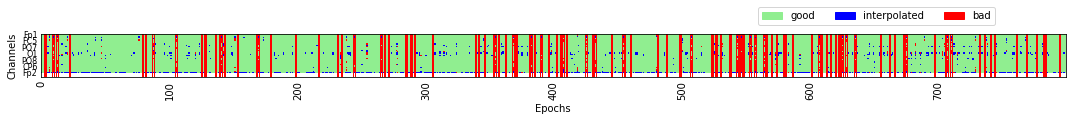

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\12\12_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.0391644098595643
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\12\12_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.6591202172472076
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\12\12_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.23093362912659127
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\12\12_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.665594796538743
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\12\12_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: -0.29985733783774593
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\12\12_KiNi4.vhdr] Addi

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 273 epochs: 2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15, 18, 19, 24, 25, 26, 28, 34, 37, 43, 50, 58, 72, 73, 88, 89, 90, 92, 95, 97, 102, 103, 108, 114, 116, 121, 128, 135, 136, 138, 139, 140, 142, 144, 149, 150, 156, 157, 160, 161, 164, 166, 167, 169, 170, 175, 177, 180, 185, 186, 187, 190, 193, 194, 199, 200, 202, 203, 204, 205, 206, 207, 209, 210, 215, 216, 217, 218, 219, 221, 222, 223, 225, 227, 230, 232, 235, 239, 243, 244, 246, 248, 250, 253, 260, 262, 263, 268, 274, 278, 279, 281, 282, 283, 288, 290, 292, 295, 299, 302, 303, 307, 315, 317, 323, 324, 325, 326, 329, 333, 334, 336, 339, 340, 343, 345, 346, 349, 351, 352, 354, 356, 359, 361, 363, 364, 366, 367, 369, 373, 375, 376, 377, 387, 388, 391, 395, 398, 400, 402, 403, 404, 405, 406, 407, 408, 411, 413, 414, 416, 419, 428, 435, 443, 444, 445, 453, 454, 455, 458, 468, 469, 470, 472, 473, 478, 482, 487, 488, 492, 512, 517, 518, 519, 523, 528, 529, 530, 531, 532, 533, 534, 536, 537, 539, 540, 541, 546, 549, 553, 554, 557, 570, 

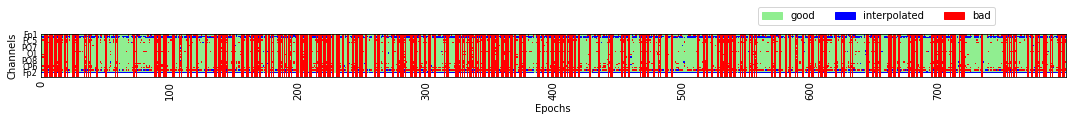

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\13\13_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.0926862982900312
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\13\13_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.3804687852461812
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\13\13_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.044241412967864144
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\13\13_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.34279872937039646
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\13\13_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 0.896271326112425
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\13\13_KiNi4.vhdr] Adding

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 59 epochs: 19, 28, 59, 64, 65, 66, 71, 73, 75, 82, 90, 91, 93, 110, 113, 162, 180, 205, 220, 272, 277, 312, 313, 335, 339, 340, 355, 360, 363, 381, 382, 383, 388, 393, 404, 433, 464, 474, 475, 515, 528, 538, 554, 580, 590, 603, 647, 665, 674, 721, 727, 752, 764, 768, 769, 771, 775, 781, 782


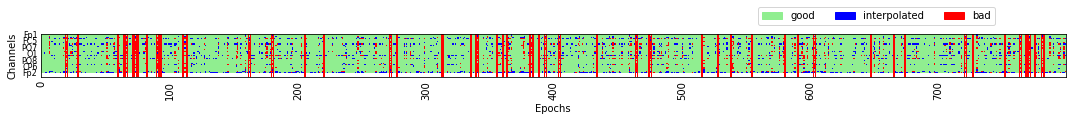

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\14\14_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.4692082700032868
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\14\14_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.023159110572998416
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\14\14_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.3900669857023174
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\14\14_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.9454233570099567
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\14\14_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: -0.5097458903450611
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\14\14_KiNi4.vhdr] Addin

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 264 epochs: 3, 4, 6, 9, 11, 12, 13, 16, 18, 19, 20, 22, 29, 30, 31, 32, 35, 55, 56, 57, 58, 60, 62, 64, 67, 69, 71, 79, 83, 85, 88, 90, 95, 96, 99, 101, 104, 105, 111, 115, 118, 120, 122, 123, 124, 133, 134, 140, 144, 147, 149, 151, 153, 156, 157, 160, 167, 169, 170, 171, 175, 179, 181, 182, 183, 186, 187, 192, 193, 195, 200, 201, 202, 205, 207, 209, 215, 216, 221, 222, 223, 224, 230, 231, 233, 237, 238, 240, 243, 244, 245, 246, 248, 253, 255, 258, 259, 261, 263, 266, 270, 273, 280, 285, 288, 289, 291, 294, 295, 304, 310, 313, 317, 318, 320, 321, 322, 324, 328, 335, 336, 337, 341, 345, 346, 354, 355, 356, 358, 361, 378, 385, 387, 394, 395, 400, 401, 402, 403, 404, 405, 406, 407, 414, 421, 423, 424, 426, 431, 435, 439, 440, 446, 447, 449, 450, 451, 454, 455, 457, 460, 461, 462, 470, 474, 476, 482, 485, 487, 489, 495, 497, 498, 502, 505, 506, 513, 514, 515, 533, 541, 544, 546, 550, 552, 561, 562, 563, 564, 566, 567, 572, 575, 576, 580, 587, 591, 592, 596, 597, 601, 603, 604, 605,

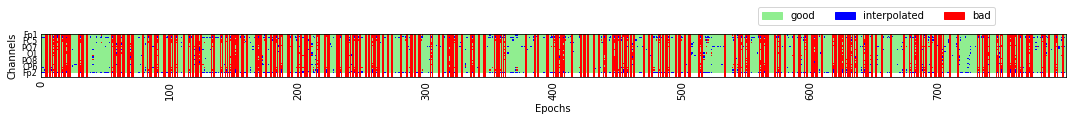

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\15\15_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: -1.3057696119398088
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\15\15_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.83010933209161
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\15\15_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 1.050425111259103
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\15\15_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.3979037541930439
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\15\15_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: -0.9321888812856977
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\15\15_KiNi4.vhdr] Adding Me

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 37 epochs: 4, 6, 93, 133, 142, 144, 145, 150, 160, 181, 194, 267, 302, 308, 336, 340, 347, 349, 374, 375, 435, 442, 459, 461, 462, 472, 490, 592, 604, 605, 613, 631, 659, 684, 685, 715, 790


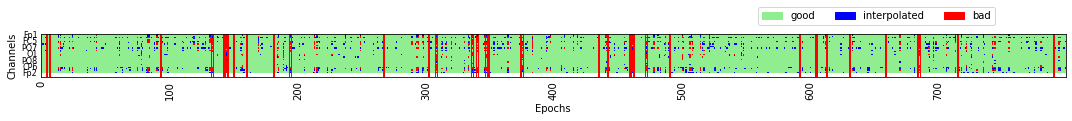

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\16\16_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 4.504334876327447
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\16\16_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 4.248536137614672
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\16\16_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -1.649820161159171
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\16\16_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.8348848289892639
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\16\16_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 5.163900124748223
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\16\16_KiNi4.vhdr] Adding Mea

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 298 epochs: 17, 19, 36, 37, 38, 40, 52, 57, 59, 68, 74, 78, 79, 84, 88, 92, 100, 105, 107, 108, 113, 114, 119, 120, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 140, 141, 142, 144, 145, 147, 149, 150, 151, 152, 153, 154, 155, 159, 161, 162, 164, 166, 171, 177, 182, 184, 186, 189, 190, 191, 193, 196, 197, 199, 200, 202, 203, 204, 205, 207, 216, 229, 230, 232, 245, 247, 249, 250, 256, 260, 263, 264, 267, 270, 271, 278, 279, 284, 290, 291, 292, 295, 303, 305, 307, 311, 314, 317, 319, 320, 321, 322, 324, 327, 330, 331, 334, 335, 338, 340, 341, 343, 344, 346, 347, 351, 352, 360, 363, 372, 373, 379, 380, 381, 384, 385, 387, 388, 390, 392, 395, 396, 397, 399, 400, 405, 406, 409, 415, 417, 421, 425, 427, 438, 439, 440, 445, 446, 447, 453, 455, 457, 459, 463, 464, 466, 467, 469, 470, 475, 477, 480, 482, 483, 484, 485, 487, 489, 491, 493, 494, 495, 496, 497, 498, 501, 502, 503, 504, 505, 506, 507, 508, 511, 512, 513, 514, 515, 516, 517, 524, 533, 536, 537, 542, 544, 551, 552, 5

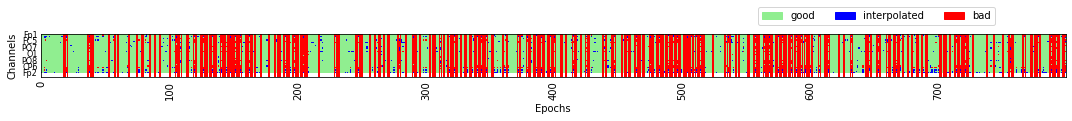

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\18\18_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.9495691126795518
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\18\18_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.9494559340051854
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\18\18_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -0.6957397654361189
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\18\18_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.8671506483525312
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\18\18_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.9858575094305162
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\18\18_KiNi4.vhdr] Adding

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 632 events were added and 0 were skipped.
====================== EPOCHING ======================
tmin:-0.4, tmax:3.4, baseline=(-0.4, 0)
Not setting meta

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 632 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/632 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/632 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/632 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/632 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/632 [00:00<?,       ?it/s]

Dropped 144 epochs: 7, 20, 21, 32, 33, 36, 37, 39, 45, 46, 47, 48, 51, 55, 58, 59, 68, 71, 79, 81, 85, 87, 91, 93, 94, 100, 101, 103, 108, 117, 118, 137, 144, 148, 151, 153, 155, 156, 168, 186, 191, 197, 198, 204, 207, 209, 210, 211, 212, 213, 214, 218, 221, 222, 224, 227, 229, 230, 231, 245, 247, 250, 261, 270, 274, 278, 283, 289, 291, 309, 315, 316, 326, 338, 347, 350, 352, 363, 364, 366, 373, 374, 379, 383, 386, 388, 391, 397, 410, 411, 412, 413, 423, 428, 436, 443, 448, 449, 450, 453, 454, 456, 457, 458, 462, 464, 466, 477, 478, 489, 491, 493, 494, 497, 501, 502, 503, 508, 509, 520, 526, 527, 539, 544, 545, 547, 550, 552, 561, 570, 572, 573, 583, 588, 589, 596, 603, 605, 606, 609, 612, 619, 620, 623


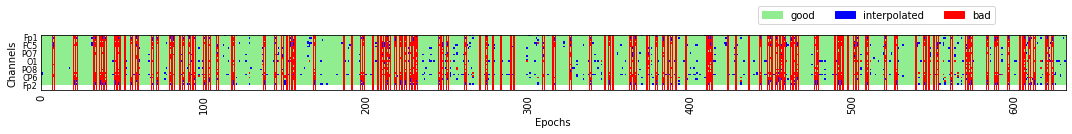

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\19\19_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.4615897751771889
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\19\19_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.2425965201897208
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\19\19_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -0.11279296824508273
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\19\19_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.4930485881803125
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\19\19_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 0.003104334267465424
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\19\19_KiNi4.vhdr] Ad

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 222 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 11, 20, 22, 41, 50, 51, 53, 65, 67, 73, 75, 90, 91, 93, 106, 111, 126, 137, 138, 139, 140, 141, 145, 153, 155, 157, 160, 162, 175, 180, 181, 182, 183, 184, 191, 199, 200, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 216, 223, 224, 229, 230, 249, 251, 256, 257, 261, 271, 272, 283, 291, 296, 298, 299, 303, 304, 309, 313, 315, 316, 317, 325, 330, 334, 338, 339, 353, 354, 355, 356, 357, 367, 372, 374, 376, 377, 381, 383, 387, 388, 389, 390, 392, 395, 400, 401, 402, 403, 404, 406, 407, 408, 412, 413, 415, 416, 421, 442, 449, 450, 452, 464, 467, 475, 476, 478, 488, 494, 501, 502, 503, 505, 511, 512, 515, 516, 517, 523, 532, 542, 543, 544, 546, 547, 551, 554, 556, 557, 558, 569, 572, 575, 576, 577, 578, 580, 585, 592, 593, 594, 595, 596, 601, 602, 604, 605, 607, 612, 616, 617, 619, 626, 631, 632, 633, 634, 638, 642, 645, 648, 653, 661, 672, 674, 675, 683, 685, 687, 688, 689, 690, 701, 704, 712, 713, 714, 715, 718, 721, 731, 733, 734, 736, 738, 

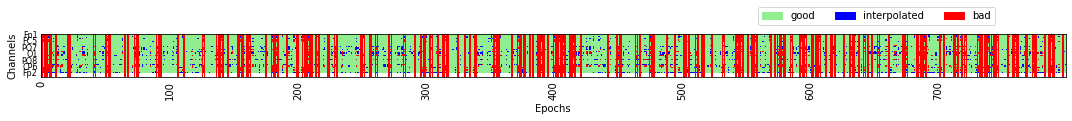

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\20\20_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.041893075439446
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\20\20_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.633976151323281
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\20\20_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 1.560347969431831
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\20\20_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.4033081302952137
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\20\20_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: -0.42436728812603497
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\20\20_KiNi4.vhdr] Adding Me

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 209 epochs: 7, 11, 17, 24, 26, 30, 31, 32, 33, 34, 36, 38, 40, 42, 43, 44, 47, 56, 61, 62, 63, 65, 66, 70, 75, 76, 77, 78, 79, 80, 82, 85, 87, 88, 89, 90, 93, 94, 104, 107, 109, 111, 113, 116, 117, 120, 124, 135, 139, 162, 173, 176, 178, 181, 183, 187, 195, 197, 215, 224, 239, 242, 243, 244, 248, 249, 250, 251, 252, 253, 259, 267, 269, 272, 273, 275, 280, 283, 284, 285, 287, 289, 290, 295, 296, 297, 298, 300, 305, 309, 321, 344, 348, 366, 369, 373, 375, 378, 379, 383, 384, 386, 401, 410, 414, 417, 421, 426, 432, 433, 435, 438, 440, 442, 445, 446, 448, 451, 453, 457, 461, 463, 464, 465, 467, 478, 481, 483, 485, 486, 489, 491, 493, 495, 497, 498, 499, 500, 501, 505, 509, 518, 535, 547, 549, 558, 560, 562, 563, 568, 571, 573, 574, 575, 579, 581, 584, 599, 606, 617, 622, 628, 630, 635, 637, 638, 639, 640, 643, 644, 647, 648, 649, 653, 657, 659, 662, 663, 665, 667, 671, 675, 678, 680, 681, 687, 688, 690, 692, 697, 729, 731, 733, 744, 748, 751, 752, 753, 754, 755, 757, 765, 771, 774,

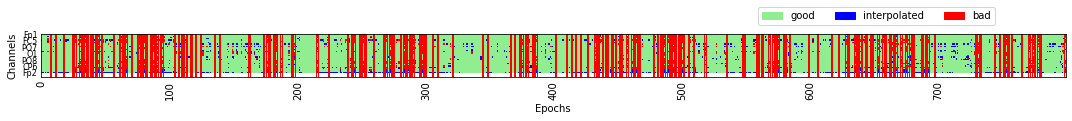

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\21\21_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.0402277686623524
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\21\21_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.156792798621925
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\21\21_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.06798590270607362
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\21\21_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.3774911878650267
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\21\21_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.3046824487035864
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\21\21_KiNi4.vhdr] Adding 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 167 epochs: 0, 7, 11, 18, 21, 22, 24, 25, 28, 29, 30, 32, 34, 45, 51, 56, 61, 70, 73, 76, 79, 86, 88, 94, 104, 110, 124, 130, 134, 135, 140, 141, 142, 144, 145, 146, 148, 155, 168, 170, 171, 176, 181, 182, 188, 192, 194, 200, 207, 212, 221, 222, 224, 225, 226, 228, 229, 230, 231, 234, 235, 240, 247, 248, 249, 251, 253, 255, 259, 260, 271, 278, 279, 280, 281, 282, 283, 303, 316, 317, 327, 343, 346, 347, 350, 351, 354, 359, 365, 366, 368, 372, 379, 383, 384, 387, 388, 396, 400, 403, 416, 422, 424, 426, 439, 443, 446, 449, 451, 453, 456, 468, 471, 482, 484, 488, 494, 502, 504, 506, 507, 510, 512, 516, 519, 537, 543, 546, 553, 557, 560, 563, 573, 578, 580, 583, 585, 593, 599, 607, 614, 617, 618, 623, 627, 630, 631, 636, 639, 650, 664, 665, 669, 687, 688, 701, 721, 726, 729, 731, 755, 757, 760, 765, 778, 791, 792


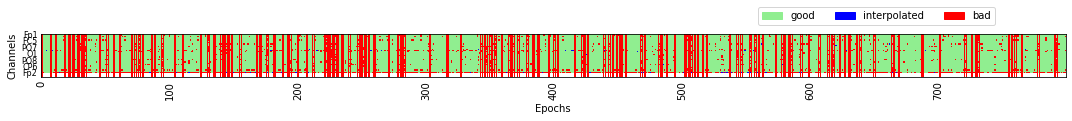

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\22\22_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.861501741270305
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\22\22_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.6375786155721226
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\22\22_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.3688125703633408
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\22\22_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.513854728381507
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\22\22_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.923566280113376
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\22\22_KiNi4.vhdr] Adding Me

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 95 epochs: 1, 8, 9, 17, 40, 49, 50, 51, 54, 57, 58, 71, 115, 137, 180, 187, 192, 194, 199, 216, 229, 236, 241, 248, 249, 250, 270, 280, 335, 355, 359, 362, 364, 365, 377, 379, 383, 388, 391, 392, 400, 401, 403, 407, 412, 414, 425, 433, 455, 457, 460, 464, 480, 490, 501, 502, 503, 537, 538, 550, 552, 555, 557, 565, 567, 568, 571, 581, 583, 589, 592, 602, 609, 620, 622, 628, 630, 632, 633, 635, 640, 645, 662, 717, 721, 736, 750, 751, 758, 764, 767, 769, 771, 778, 793


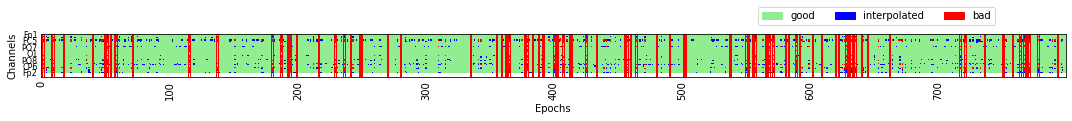

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\23\23_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.22821591516298
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\23\23_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.3558275902672468
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\23\23_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -0.19720515950334117
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\23\23_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.8950941609300856
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\23\23_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 2.1482982772959005
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\23\23_KiNi4.vhdr] Adding 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 92 epochs: 2, 7, 14, 29, 45, 47, 51, 63, 74, 79, 97, 98, 103, 114, 119, 128, 147, 154, 169, 175, 182, 188, 194, 203, 237, 247, 250, 253, 264, 271, 283, 284, 295, 303, 328, 330, 332, 345, 351, 382, 383, 387, 391, 405, 407, 408, 427, 436, 448, 455, 461, 471, 473, 480, 482, 487, 489, 502, 505, 509, 518, 555, 556, 560, 564, 575, 577, 580, 587, 595, 596, 598, 605, 619, 637, 640, 664, 673, 703, 712, 717, 718, 720, 727, 731, 736, 738, 751, 755, 764, 787, 793


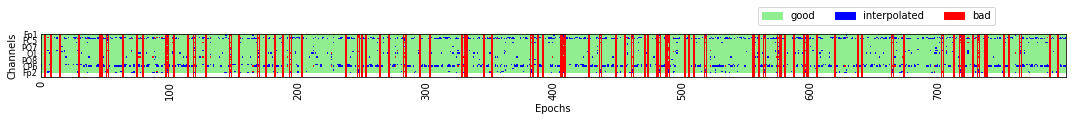

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\24\24_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.8308135434489359
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\24\24_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.9489995732975716
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\24\24_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -0.0328769510005899
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\24\24_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.8027944246637498
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\24\24_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 0.5834030061379891
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\24\24_KiNi4.vhdr] Adding

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 290 epochs: 0, 4, 6, 10, 11, 15, 19, 26, 29, 32, 36, 38, 42, 43, 45, 49, 53, 54, 58, 59, 60, 66, 70, 71, 74, 77, 85, 86, 98, 102, 106, 117, 120, 126, 131, 141, 142, 145, 146, 148, 149, 151, 152, 154, 155, 156, 158, 159, 163, 166, 167, 168, 169, 177, 178, 183, 190, 192, 198, 200, 201, 204, 205, 212, 213, 214, 216, 217, 218, 219, 222, 223, 226, 228, 230, 236, 251, 253, 261, 268, 273, 274, 279, 280, 287, 290, 293, 301, 305, 308, 311, 317, 319, 328, 330, 332, 337, 339, 341, 344, 348, 350, 352, 354, 355, 356, 358, 359, 365, 368, 369, 371, 375, 377, 378, 379, 380, 381, 384, 385, 388, 391, 392, 394, 397, 398, 399, 400, 403, 404, 406, 408, 409, 411, 412, 415, 420, 421, 424, 425, 427, 428, 430, 431, 432, 433, 441, 442, 443, 445, 446, 449, 452, 456, 459, 466, 469, 472, 473, 474, 475, 476, 480, 483, 486, 487, 489, 492, 494, 495, 498, 499, 500, 503, 507, 509, 513, 517, 518, 519, 520, 521, 523, 525, 526, 527, 528, 530, 532, 535, 538, 540, 541, 544, 545, 547, 549, 550, 559, 560, 563, 565, 56

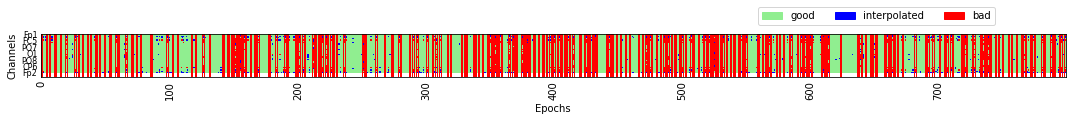

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\25\25_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.6469018637097346
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\25\25_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.378259984382903
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\25\25_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.09017600601267237
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\25\25_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.23203515321677573
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\25\25_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.545903585578818
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\25\25_KiNi4.vhdr] Adding M

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 318 epochs: 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 18, 20, 21, 31, 35, 37, 39, 45, 51, 55, 59, 62, 82, 83, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 101, 104, 105, 106, 113, 119, 121, 126, 128, 129, 130, 132, 134, 137, 138, 140, 141, 142, 144, 145, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 166, 168, 171, 172, 173, 174, 177, 180, 181, 182, 191, 194, 197, 200, 201, 202, 203, 205, 206, 211, 216, 217, 218, 219, 220, 221, 222, 224, 226, 227, 232, 233, 234, 236, 243, 249, 257, 263, 264, 267, 276, 278, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 294, 297, 304, 328, 329, 331, 334, 336, 338, 339, 341, 343, 344, 345, 350, 351, 352, 353, 354, 358, 359, 361, 363, 364, 365, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 382, 383, 384, 388, 391, 393, 394, 398, 400, 401, 402, 406, 408, 410, 412, 418, 422, 425, 429, 430, 437, 438, 440, 443, 444, 445, 448, 450, 451, 453, 458, 461, 462, 463, 464, 465, 467, 468, 471, 473, 476, 479, 482, 484, 48

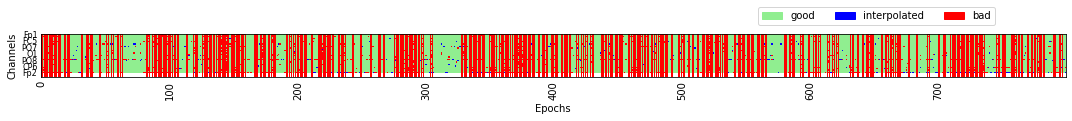

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\26\26_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 2.4785077726791065
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\26\26_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.6192098241299101
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\26\26_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -0.4276554321563677
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\26\26_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -2.1373125164980613
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\26\26_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.9170649501563808
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\26\26_KiNi4.vhdr] Adding

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 141 epochs: 1, 2, 3, 10, 11, 13, 24, 42, 49, 52, 66, 69, 76, 81, 83, 84, 87, 95, 96, 100, 102, 120, 123, 124, 125, 130, 133, 138, 142, 146, 160, 162, 166, 168, 170, 175, 176, 179, 200, 201, 202, 204, 215, 222, 236, 248, 251, 264, 265, 268, 274, 275, 276, 277, 282, 283, 284, 288, 290, 293, 295, 297, 299, 300, 312, 320, 327, 334, 342, 352, 369, 372, 377, 378, 382, 386, 389, 391, 392, 400, 404, 423, 432, 439, 440, 461, 468, 472, 474, 478, 481, 485, 521, 524, 547, 553, 554, 568, 570, 571, 574, 577, 580, 585, 588, 600, 601, 602, 603, 604, 611, 643, 644, 646, 660, 671, 672, 675, 677, 681, 684, 685, 687, 691, 692, 693, 706, 707, 712, 721, 735, 736, 743, 753, 761, 762, 763, 765, 770, 771, 777


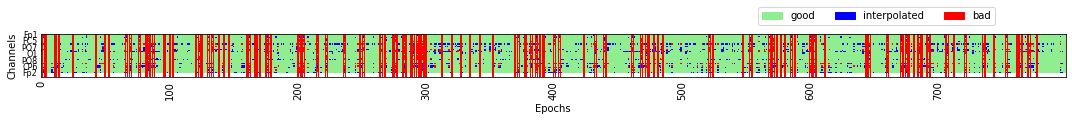

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\27\27_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: -1.8546263167559787
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\27\27_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.9438314305154356
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\27\27_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 1.2760041528681185
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\27\27_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.2493019572003508
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\27\27_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: -2.0184833559751927
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\27\27_KiNi4.vhdr] Addin

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 176 epochs: 8, 9, 16, 18, 21, 23, 24, 26, 33, 39, 42, 45, 51, 60, 73, 77, 78, 79, 80, 81, 84, 85, 87, 89, 94, 96, 98, 112, 128, 131, 133, 139, 148, 151, 160, 168, 182, 189, 192, 196, 197, 202, 204, 205, 208, 212, 215, 216, 219, 222, 223, 226, 236, 238, 242, 243, 245, 250, 251, 256, 258, 265, 275, 278, 280, 283, 284, 285, 288, 292, 303, 306, 310, 312, 318, 320, 323, 327, 334, 335, 336, 339, 340, 354, 355, 358, 360, 362, 364, 367, 369, 373, 383, 386, 387, 388, 390, 392, 393, 411, 416, 417, 418, 420, 426, 432, 435, 436, 446, 452, 460, 468, 470, 473, 478, 496, 500, 501, 502, 503, 504, 511, 527, 534, 535, 537, 558, 567, 568, 572, 575, 578, 586, 587, 590, 591, 600, 602, 609, 610, 615, 616, 617, 619, 621, 630, 632, 646, 651, 656, 663, 664, 672, 675, 692, 695, 697, 705, 709, 722, 723, 725, 738, 746, 747, 755, 759, 766, 767, 768, 771, 772, 777, 784, 787, 796


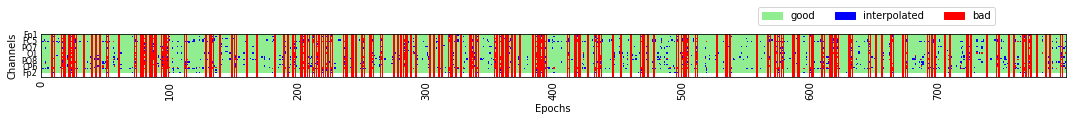

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\28\28_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.3693693690225605
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\28\28_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.07744794816669011
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\28\28_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.36448698098807397
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\28\28_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.963875974602047
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\28\28_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: -0.024116345897252204
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\28\28_KiNi4.vhdr] Addi

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 27 epochs: 104, 105, 109, 114, 115, 125, 129, 141, 173, 280, 311, 334, 339, 352, 353, 363, 459, 497, 498, 519, 521, 585, 698, 731, 734, 798, 799


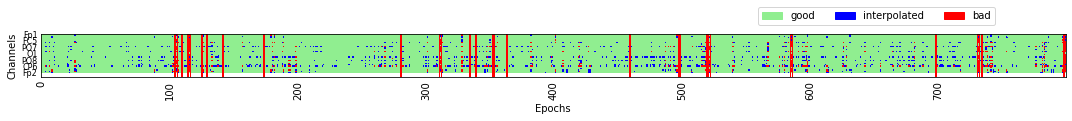

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\29\29_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.19673800504621
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\29\29_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.8952953333959729
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\29\29_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.5101200606273673
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\29\29_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.8299763913620907
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\29\29_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.452483499924701
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\29\29_KiNi4.vhdr] Adding Mean

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=30


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 3 epochs: 222, 288, 677


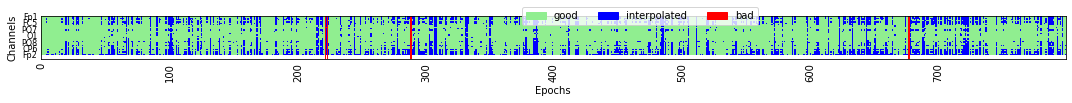

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\3\3_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.5309534481623082
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\3\3_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.5197696287110088
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\3\3_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 1.5635358798590664
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\3\3_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.1538253572736004
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\3\3_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.3801474668005842
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\3\3_KiNi4.vhdr] Adding Mean CDA Amp 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 186 epochs: 0, 2, 4, 13, 19, 31, 38, 40, 41, 46, 53, 58, 67, 69, 70, 71, 74, 75, 77, 83, 86, 88, 93, 104, 109, 112, 119, 121, 123, 126, 142, 150, 152, 158, 159, 165, 179, 180, 181, 185, 189, 191, 195, 197, 198, 200, 204, 209, 210, 211, 221, 228, 236, 237, 247, 253, 256, 263, 264, 265, 268, 269, 276, 281, 300, 304, 305, 309, 316, 324, 340, 345, 348, 349, 352, 361, 363, 367, 373, 375, 376, 383, 385, 389, 392, 393, 394, 395, 396, 398, 399, 409, 412, 413, 414, 418, 419, 423, 426, 427, 431, 437, 452, 453, 470, 471, 474, 475, 482, 485, 491, 492, 505, 506, 507, 509, 513, 518, 523, 529, 530, 531, 532, 534, 538, 539, 541, 545, 549, 551, 552, 558, 563, 573, 576, 578, 583, 584, 588, 589, 590, 597, 602, 604, 605, 614, 615, 619, 626, 630, 633, 644, 649, 660, 662, 665, 666, 668, 669, 670, 671, 672, 675, 696, 706, 708, 713, 726, 732, 734, 740, 741, 742, 752, 756, 757, 759, 761, 765, 770, 772, 781, 788, 792, 794, 795


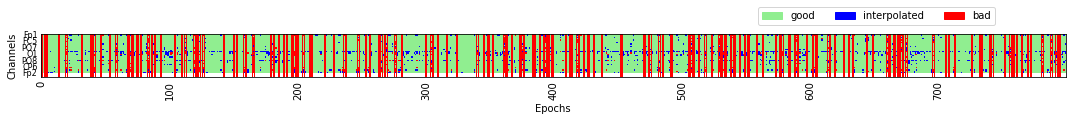

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\37\37_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.9445060808929973
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\37\37_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.41856009507508735
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\37\37_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -0.760539660382108
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\37\37_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -1.2364663047445703
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\37\37_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.1552653581768328
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\37\37_KiNi4.vhdr] Adding

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 3 epochs: 614, 673, 785


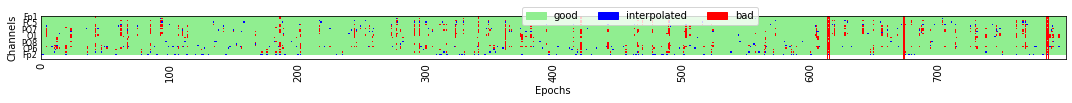

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\4\4_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: -0.00824355695057924
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\4\4_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.5073620344676655
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\4\4_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.5340389404180407
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\4\4_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.8508083191363011
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\4\4_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 0.018991884101744974
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\4\4_KiNi4.vhdr] Adding Mean CDA 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 67 epochs: 27, 32, 69, 70, 85, 91, 94, 104, 112, 128, 172, 176, 214, 215, 252, 253, 277, 284, 294, 302, 305, 317, 364, 368, 371, 372, 387, 403, 405, 406, 411, 429, 430, 443, 447, 473, 477, 482, 487, 495, 504, 505, 510, 514, 527, 536, 540, 542, 548, 573, 582, 628, 636, 652, 654, 665, 681, 687, 709, 717, 729, 733, 739, 751, 759, 771, 789


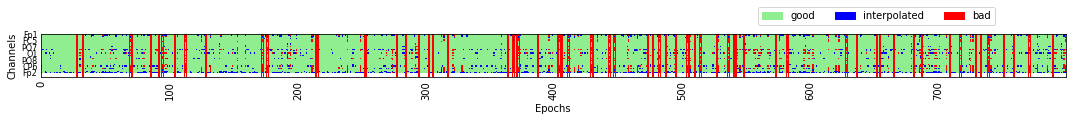

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\45\45_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: -1.157640761410946
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\45\45_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: -0.9352503358305614
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\45\45_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 1.4438514807496747
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\45\45_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.8614306819773583
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\45\45_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: -1.5761108158282022
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\45\45_KiNi4.vhdr] Adding

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 276 epochs: 12, 14, 23, 30, 34, 36, 37, 42, 43, 46, 53, 58, 59, 62, 63, 68, 70, 78, 80, 81, 89, 93, 95, 97, 98, 99, 106, 111, 113, 115, 119, 120, 121, 126, 127, 130, 131, 132, 134, 135, 136, 137, 138, 142, 144, 149, 152, 155, 157, 167, 168, 169, 170, 173, 175, 177, 181, 183, 190, 192, 193, 196, 199, 207, 212, 213, 219, 222, 223, 225, 230, 234, 237, 241, 245, 247, 249, 250, 254, 263, 275, 278, 284, 288, 292, 293, 301, 305, 310, 311, 312, 315, 317, 319, 322, 324, 325, 326, 327, 328, 329, 330, 331, 333, 334, 340, 342, 343, 346, 347, 349, 351, 354, 355, 356, 363, 366, 369, 370, 371, 373, 374, 375, 376, 379, 380, 381, 383, 384, 385, 386, 390, 392, 394, 397, 399, 402, 408, 414, 417, 432, 436, 438, 441, 443, 446, 449, 459, 460, 461, 462, 463, 466, 472, 474, 478, 481, 484, 487, 493, 495, 497, 505, 508, 512, 513, 514, 519, 522, 525, 526, 527, 528, 529, 530, 532, 533, 535, 540, 541, 542, 545, 550, 559, 560, 564, 567, 569, 570, 574, 576, 577, 582, 584, 586, 587, 588, 595, 596, 597, 598, 5

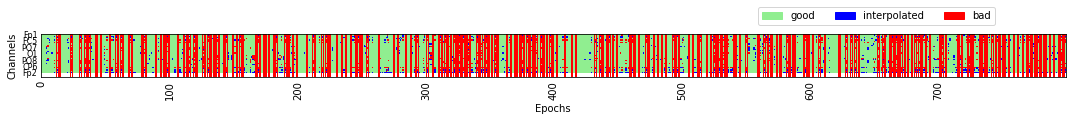

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\5\5_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.465616004292142
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\5\5_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.4224426076334111
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\5\5_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -0.2990816287839775
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\5\5_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.7055915405264964
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\5\5_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.5709827342261862
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\5\5_KiNi4.vhdr] Adding Mean CDA Amp

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 146 epochs: 29, 30, 32, 34, 42, 44, 67, 68, 69, 79, 82, 84, 92, 94, 96, 98, 106, 111, 112, 119, 121, 127, 128, 133, 137, 144, 146, 147, 148, 149, 151, 153, 164, 167, 168, 179, 185, 188, 191, 197, 198, 248, 252, 266, 267, 293, 295, 296, 297, 298, 305, 309, 313, 317, 318, 327, 328, 332, 334, 335, 336, 339, 352, 357, 358, 361, 364, 367, 368, 369, 370, 371, 374, 375, 377, 378, 386, 392, 396, 408, 418, 427, 428, 429, 441, 447, 454, 463, 488, 489, 490, 494, 497, 506, 509, 514, 519, 520, 522, 527, 529, 536, 537, 558, 559, 565, 569, 574, 583, 595, 598, 620, 622, 623, 624, 626, 648, 661, 662, 667, 671, 683, 696, 705, 706, 707, 708, 712, 715, 727, 728, 731, 732, 735, 737, 738, 741, 742, 744, 746, 751, 752, 772, 773, 787, 788


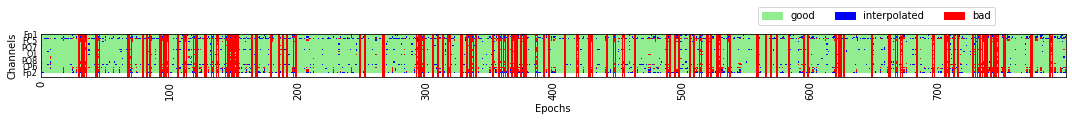

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\50\50_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 2.750350474438178
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\50\50_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 2.929742569490207
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\50\50_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: -0.33767901943410816
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\50\50_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.5166502663611668
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\50\50_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 2.774404230095957
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\50\50_KiNi4.vhdr] Adding Me

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 70 epochs: 9, 27, 41, 42, 43, 62, 67, 76, 102, 120, 131, 135, 136, 144, 145, 151, 154, 190, 193, 198, 230, 248, 250, 268, 281, 315, 350, 354, 376, 380, 393, 394, 397, 402, 403, 451, 458, 482, 489, 493, 517, 525, 529, 533, 536, 552, 558, 562, 583, 595, 606, 624, 630, 633, 635, 639, 650, 665, 684, 691, 703, 711, 717, 721, 722, 724, 749, 774, 777, 795


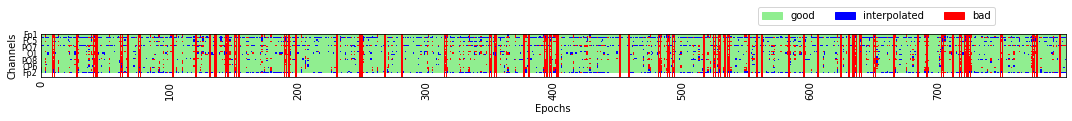

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\6\6_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 0.46862003504929606
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\6\6_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.07831052152935475
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\6\6_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.5862768717890915
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\6\6_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 0.6930753298308536
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\6\6_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: -0.39597487619930083
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\6\6_KiNi4.vhdr] Adding Mean CDA 

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\mne\bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Yannick\Miniconda3\envs\clct\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 242 epochs: 1, 3, 4, 5, 9, 12, 13, 15, 16, 17, 19, 20, 21, 25, 27, 29, 31, 32, 33, 34, 42, 44, 47, 49, 50, 72, 74, 76, 78, 80, 82, 95, 97, 100, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 131, 132, 133, 136, 143, 149, 151, 164, 171, 173, 174, 188, 202, 203, 207, 210, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 227, 231, 236, 239, 248, 250, 252, 253, 257, 258, 262, 268, 272, 275, 280, 286, 291, 296, 306, 307, 309, 311, 315, 316, 317, 321, 322, 324, 326, 327, 328, 329, 332, 334, 335, 336, 337, 338, 339, 342, 349, 350, 353, 354, 357, 360, 364, 372, 375, 377, 384, 386, 389, 398, 399, 401, 402, 403, 404, 407, 409, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 427, 428, 429, 430, 433, 455, 466, 468, 469, 473, 474, 478, 479, 488, 497, 504, 506, 507, 511, 512, 513, 514, 515, 516, 518, 519, 520, 521, 522, 524, 545, 562, 564, 565, 571, 577, 583, 584, 590, 592, 595, 598, 603, 611, 612, 613, 614, 616, 618, 619, 620, 621, 622, 623, 624, 625, 627, 630, 635, 652

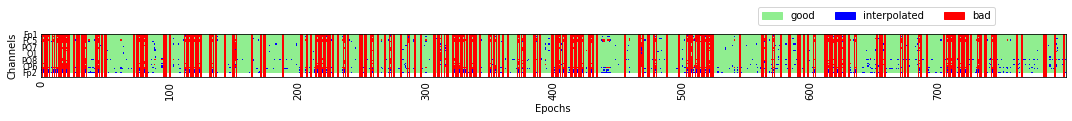

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\7\7_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: 1.4458310140752373
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\7\7_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 1.239335112226088
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\7\7_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 1.3347324851435503
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\7\7_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: 1.7757741903670141
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\7\7_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 0.8137041327837351
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\7\7_KiNi4.vhdr] Adding Mean CDA Amp f

<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
<ipython-input-6-dc4d74a83f04>:68: RuntimeWarning: Not setting positions of 3 misc channels found in montage:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
A total of 800 events were added and 0 were skipped.
====================== EPOCHING ===========

D:\PhD\CDA-review\studies\cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


0 bad epochs dropped
A total of 800 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/800 [00:00<?,       ?it/s]

Dropped 235 epochs: 2, 4, 26, 32, 37, 38, 42, 43, 53, 54, 55, 56, 57, 61, 62, 63, 67, 75, 76, 82, 84, 91, 93, 94, 101, 103, 106, 111, 116, 126, 127, 134, 137, 138, 140, 142, 144, 145, 146, 147, 148, 153, 154, 156, 160, 173, 174, 177, 179, 183, 186, 187, 188, 191, 192, 193, 206, 208, 221, 233, 234, 240, 243, 247, 259, 262, 274, 275, 276, 288, 297, 300, 304, 305, 308, 309, 314, 318, 319, 322, 326, 329, 330, 332, 336, 337, 338, 339, 342, 344, 345, 346, 348, 349, 350, 353, 354, 355, 356, 357, 362, 365, 366, 368, 382, 383, 384, 385, 387, 391, 393, 394, 395, 396, 397, 400, 403, 410, 429, 431, 435, 436, 438, 439, 442, 443, 445, 452, 453, 455, 457, 459, 462, 465, 468, 473, 474, 475, 477, 480, 481, 493, 495, 496, 499, 501, 504, 506, 507, 512, 513, 515, 518, 519, 520, 522, 523, 524, 525, 526, 529, 530, 531, 538, 539, 541, 545, 546, 551, 570, 574, 575, 576, 580, 583, 586, 587, 589, 593, 609, 611, 627, 629, 634, 639, 640, 652, 658, 670, 674, 675, 676, 679, 681, 682, 684, 688, 689, 697, 699, 700, 7

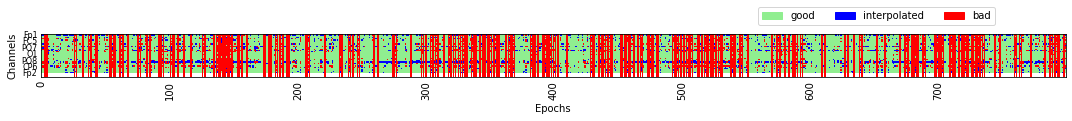

---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\8\8_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-good: -0.10900980537197698
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\8\8_KiNi4.vhdr] Adding Mean CDA Amp for 2-left-bad: 0.1917321298153378
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\8\8_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-good: 0.21351084133610806
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\8\8_KiNi4.vhdr] Adding Mean CDA Amp for 2-right-bad: -0.7039377852314065
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\8\8_KiNi4.vhdr] Adding Mean CDA Amp for 4-left-good: 1.179379047724601
[G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\8\8_KiNi4.vhdr] Adding Mean CDA A

,2,4,left,right,good,bad,2-left,2-left-CDA,2-left-good,2-left-good-CDA,...,4-right-good,4-right-good-CDA,right-good-CDA,4-right-bad,4-right-bad-CDA,right-bad-CDA,checksum,notes,good-CDA,bad-CDA
G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\10\10_WM_att_NHKA.vhdr,400,400,400,400,571,229,200,0,154,-0.38556,...,128,2.694847,2.490316,72,0.766557,2.143193,0,,1.231133,0.667573
G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\11\11_WM_att_NHKA.vhdr,400,400,400,400,665,135,200,0,190,1.087069,...,154,-0.03383,-0.133316,46,-0.057432,0.159658,0,0,0.570833,0.708156
G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\12\12_WM_att_NHKA.vhdr,400,400,400,400,723,77,200,0,192,1.542506,...,168,0.918139,0.494282,32,0.607336,1.989696,0,0,0.992935,1.506545
G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\13\13_WM_att_NHKA.vhdr,400,400,400,400,620,180,200,0,169,0.995383,...,136,-0.301449,-0.541912,64,-0.472406,-0.837002,0,0,0.291258,-0.172672
G:\CDA Datasets\Hakim 2019\Exp1a\EEGData\15\15_WM_att_NHKA.vhdr,400,400,400,400,484,316,200,0,140,-0.243991,...,103,0.565617,0.963716,97,1.231087,0.966524,0,0,0.327997,0.096665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\5\5_KiNi4.vhdr,400,400,400,400,662,138,200,0,174,1.465616,...,153,-0.071092,-0.185087,47,-0.444453,-0.575022,0,0,0.666606,0.429455
G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\50\50_KiNi4.vhdr,400,400,400,400,646,154,200,0,175,2.75035,...,152,1.02992,0.34612,48,0.692939,0.604795,0,0,1.554249,1.50641
G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\6\6_KiNi4.vhdr,400,400,400,400,598,202,200,0,163,0.46862,...,138,0.284532,0.435404,62,0.432064,0.56257,0,0,0.235863,0.328069
G:\CDA Datasets\Hakim 2019\Exp2b\EEGData\7\7_KiNi4.vhdr,400,400,400,400,421,379,200,0,112,1.445831,...,91,1.919564,1.627148,109,1.626656,1.701215,0,0,1.378458,1.470421


In [6]:
#==================================================================
# General Variables
#==================================================================
study_id = 'Hakim2019'

triggers = dict();

triggers['2'] = [2, 3]
triggers['4'] = [4, 5]

triggers['left'] = [3, 5]   #[2, 4]
triggers['right'] = [2, 4]  #[3, 5]

triggers['good'] = [91]
triggers['bad'] = [90]

# Labels
conds = ['2', '4']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['O2', 'PO4', 'PO8', 'P4', 'P8']
chan_left = ['O1', 'PO3', 'PO7', 'P3', 'P7']

# Epoch Information
epoch_length = 3.4
epoch_tmin = -0.4
baseline_corr = (-0.4, 0)

# CDA info
cda_window = (0.4, 1.45)

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
experiences = ['Exp1a', 'Exp1b', 'Exp2a', 'Exp2b'] 

eegfiles = []
for cur_exp in experiences:
    #folderpath = '/Volumes/Nick - Data/CDA Datasets/Hakim 2019/{}/EEGData/**/*.vhdr'.format(cur_exp)
    folderpath = 'G:\\CDA Datasets\\Hakim 2019\\{}\\EEGData\\**\\*.vhdr'.format(cur_exp)
    for filepath in glob.glob(folderpath, recursive=True):
        eegfiles.append(filepath)

for filepath in eegfiles:
    filename = filepath[filepath.rfind('/')+1:]
    print('Processing: ' + filename + '...')
   
    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_brainvision(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Set Electrodes Locations - Used Brain Products (locations seem to in eeg file...)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    
    preproc = raw
    
    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = mne.events_from_annotations(preproc)
        
    # Select Channels (to save time on cleaning)
    #preproc = preproc.pick_channels(chan_right + chan_left)
    
    # Plot (visual check)
    #preproc.plot(events=events, block=True, lowpass=40)
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------    
    specific_events = get_specific_events(events[0], conds, sides, perfs, triggers, internal_triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict
    
    # times, used for CDA mean amp report.
    times = epochs_dict[conds[0]][sides[0]][perfs[0]].times
    
    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)
    
    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
print('{} Subjects & {} Trials'.format(len(report), 2*np.sum([report[cond].sum() for cond in conds])))
report

## Save / Load CDA

In [11]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
#data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz-recall.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

MemoryError: 

## 4. Plot CDA Data - Grand CDA Average

In [16]:
cda_all = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()

    perf = 'good'
    for f in cda_dict_all.keys():
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = (cda_dict_all[f][cond]['left']['good'] + cda_dict_all[f][cond]['right']['good'])/2
            print(cda_dict_cur)
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

[-1.61490413e-07 -1.74877748e-07 -1.83314830e-07 ...  7.01667015e-07
  6.89421028e-07  6.68097025e-07]
[-4.99238432e-08 -3.95072783e-08 -3.05890887e-08 ... -4.81598124e-07
 -4.41101279e-07 -3.93509404e-07]
[9.54416958e-07 1.01411428e-06 1.05384358e-06 ... 9.76005051e-08
 8.30227509e-08 7.18441246e-08]
[-6.86297991e-08 -9.83059224e-08 -1.30888563e-07 ...  7.36659199e-07
  7.15350610e-07  6.92303938e-07]
[ 2.22700057e-07  3.24971337e-07  4.14159019e-07 ... -2.07022682e-07
 -2.00470241e-07 -1.76560582e-07]
[ 2.14525893e-07  1.94742870e-07  1.69107496e-07 ... -4.37658174e-07
 -4.36282073e-07 -4.21690066e-07]
[ 1.49812761e-07  1.62587425e-07  1.70062586e-07 ... -1.63926871e-07
 -1.80315954e-07 -1.96204202e-07]
[-3.26657204e-07 -2.51676950e-07 -1.88811357e-07 ... -2.52536770e-07
 -2.13822021e-07 -1.80323104e-07]
[-6.59985089e-07 -6.98248575e-07 -7.15414914e-07 ...  2.76204351e-07
  2.79861711e-07  2.94752125e-07]
[ 2.04526113e-07  2.13422772e-07  2.17392632e-07 ... -8.15285526e-08
 -5.553152

## Final CDA figure from Hakim 2019 - Good

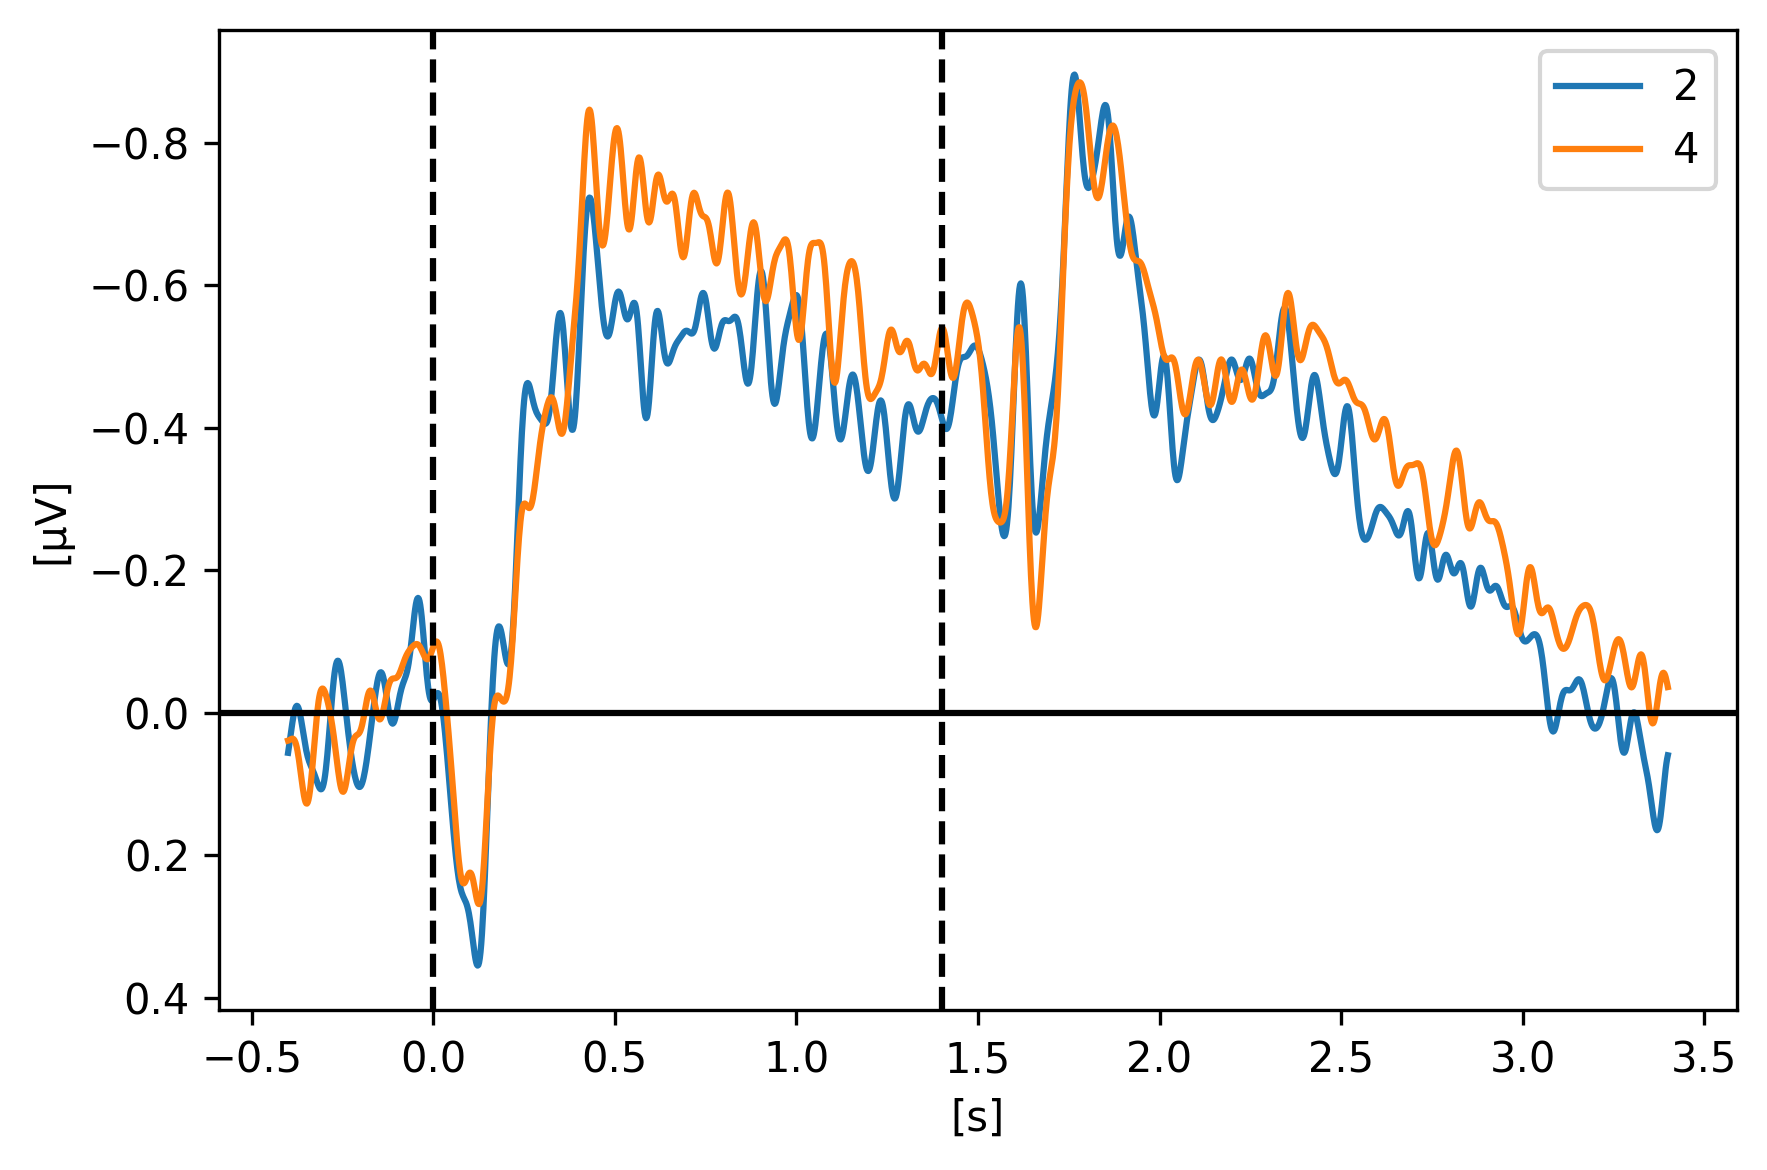

In [19]:
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(times, cda_all['2'].mean(0) * -1e6, label='2')
plt.plot(times, cda_all['4'].mean(0) * -1e6, label='4')
plt.axvline(x=0, color='k', linestyle='--')
plt.axvline(x=1.4, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')

plt.tight_layout()
fig.savefig("./Hakim2019-recall.png", dpi=300, format='png')

## Final CDA figure from Hakim 2019 - Bad

In [19]:
cda_all = dict()

for cond in cda_dict[list(cda_dict.keys())[0]].keys():
    cda_all[cond] = dict()

    perf = 'bad'
    for f in cda_dict.keys():
        ldict = cda_dict[f][cond]['left']
        rdict = cda_dict[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = (cda_dict[f][cond]['left']['good'] + cda_dict[f][cond]['right']['good'])/2
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

==== SKIPPED: 0 points! (File: 9_WM_att_V2_NHKA.vhdr - Cond: 2)


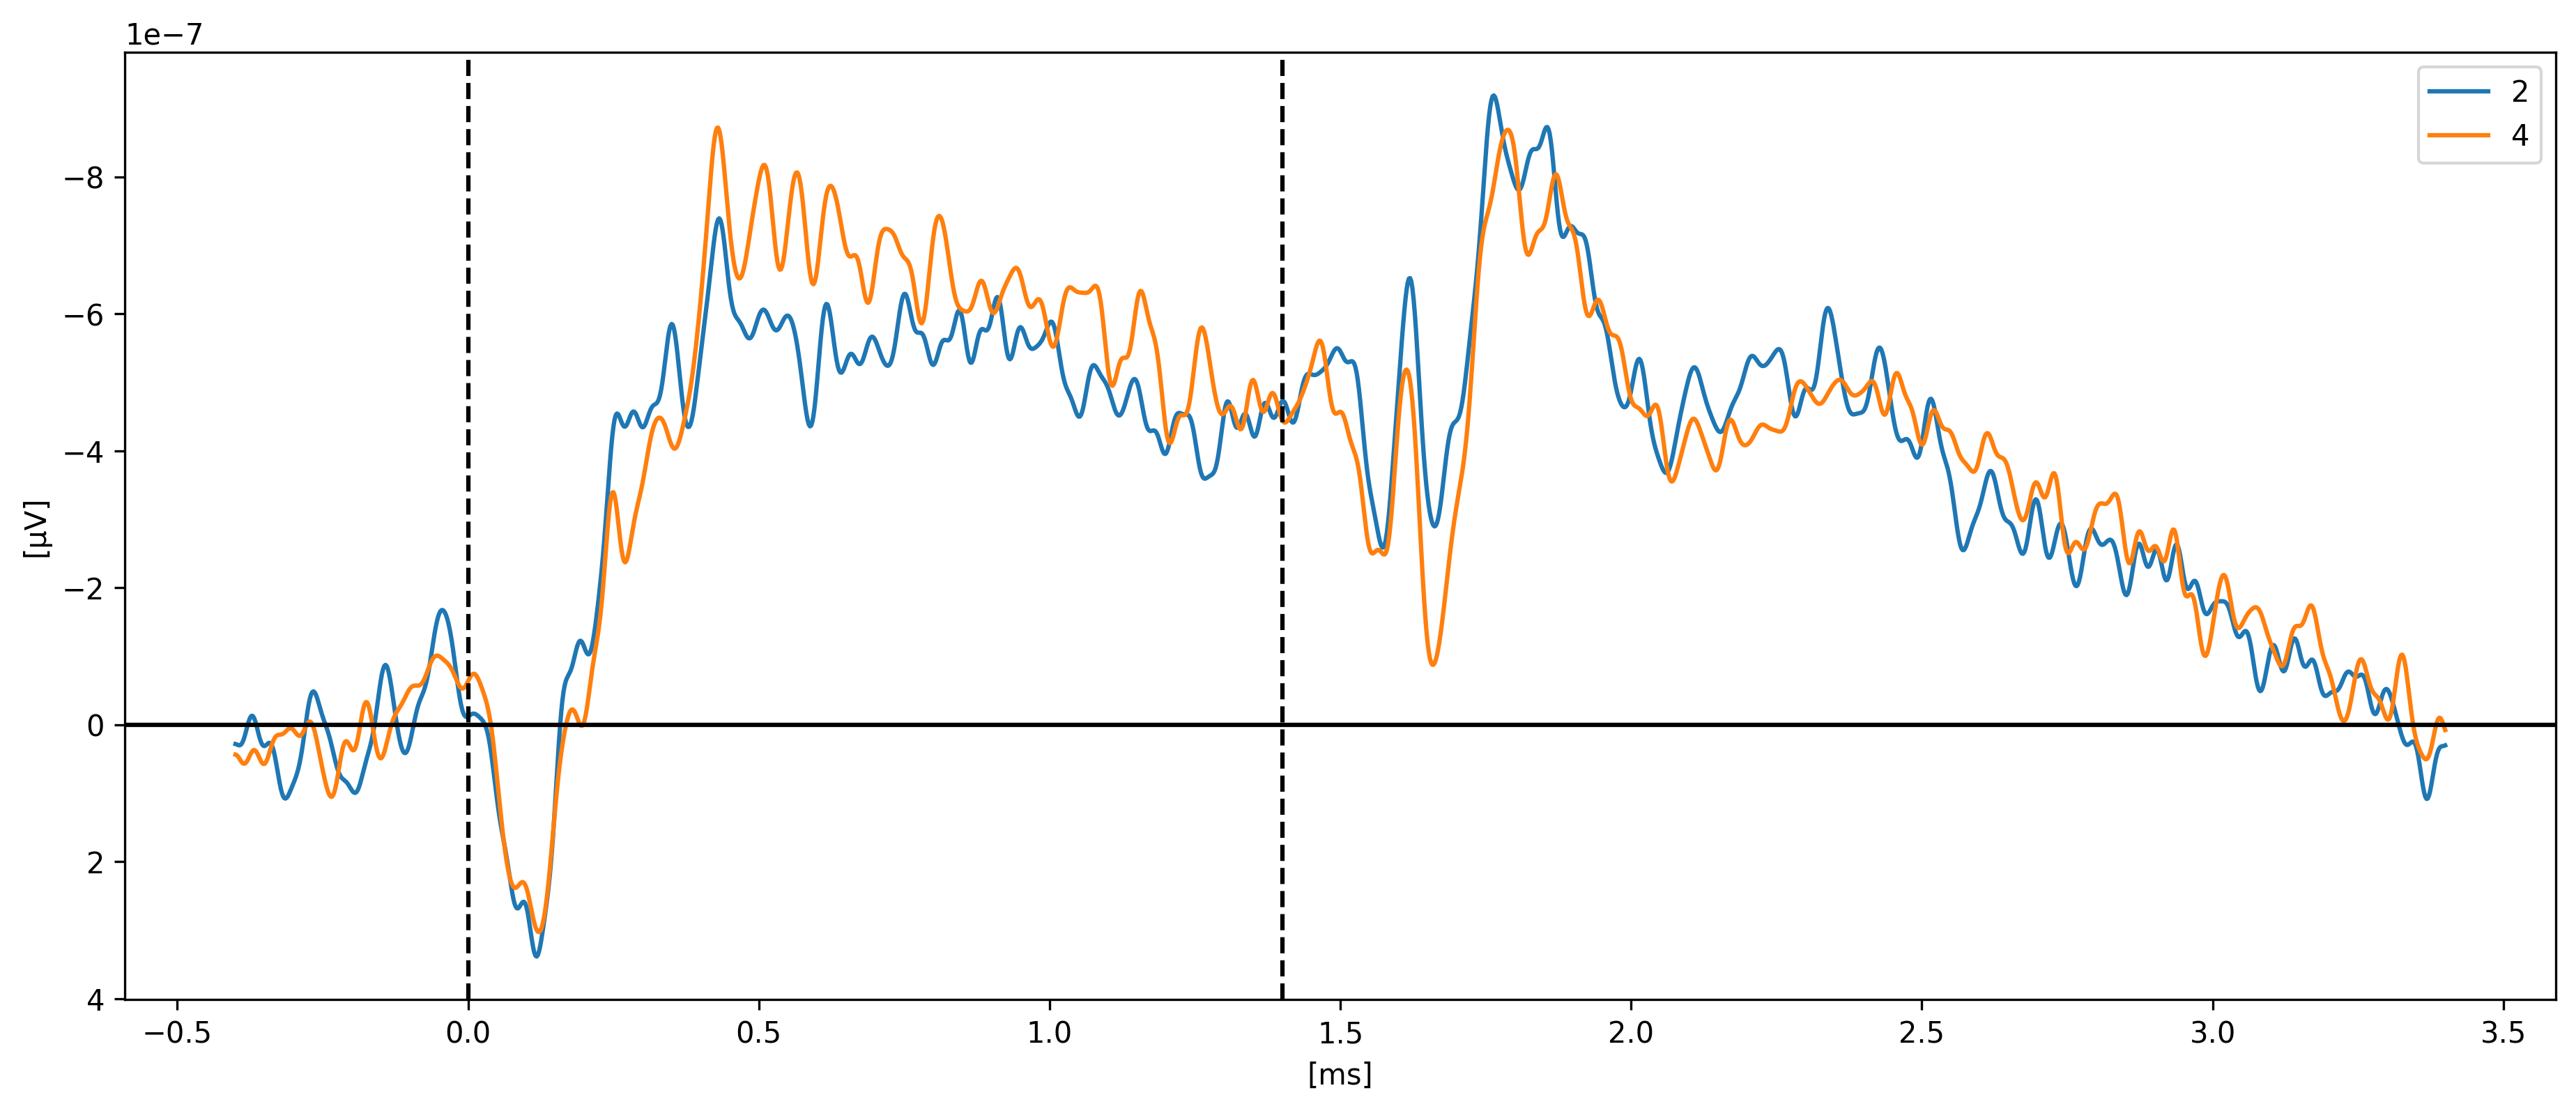

In [21]:
plt.figure(figsize=(15, 6), dpi=300)
plt.plot(times, cda_all['2'].mean(0), label='2')
plt.plot(times, cda_all['4'].mean(0), label='4')
plt.axvline(x=0, color='k', linestyle='--')
plt.axvline(x=1.4, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[ms]')
plt.show()
#plt.savefig("./img/Hakim-2019_CDA-reprod.jpg", dpi=300)